# Import and paths

In [1]:
# %%
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

DATA = 'bbn'
FAMILY = {
  'bbn' : [
          'CONTACT_INFO',
          'EVENT',
          'FACILITY',
          'GPE',
          'LOCATION',
          'ORGANIZATION',
          'PRODUCT',
          'SUBSTANCE',
          'WORK_OF_ART'],
  'figer' : ['art',
            'broadcast',
            'building',
            'computer',
            'education',
            'event',
            'finance',
            'geography',
            'government',
            'internet',
            'living_thing',
            'location',
            'medicine',
            'metropolitan_transit',
            'organization',
            'people',
            'person',
            'product',
            'rail',
            'religion',
            'transportation',
            'visual_art']
}

SUBSET = [10, 20, 40]
KB_MODE = ['bottom_up', 'top_down', 'hybrid', 'horizontal']
METRIC = ['precision', 'recall', 'f1']
PROJECTOR = ['classifier', 'box', 'kenn_bottom_up', 'kenn_top_down', 'kenn_hybrid', 'kenn_horizontal']

# set paths
# METRICS_FILE_PATH = f'../incremental/results/wandb_export/{DATA}/metrics_aggregated.csv'
METRICS_FILE_PATH = f'../incremental/results/wandb_export/{DATA}/metrics.csv'
# METRICS_FILE_PATH = './metrics.csv'


# Read metrics

In [2]:
df_metrics = pd.read_csv(METRICS_FILE_PATH)
df_metrics['projector'] =df_metrics['projector'].apply(lambda x: x.replace('_adapter_bert_ms', ''))
df_metrics

metric        projector  \
0                                        test/micro  kenn_horizontal   
1                 test_incremental_only/macro_types  kenn_horizontal   
2                                test/macro_example  kenn_horizontal   
3          test_incremental/macro_example_exclusive  kenn_horizontal   
4     test_incremental_CONTACT_INFO-url/macro_types  kenn_horizontal   
...                                             ...              ...   
8689            test_incremental_only/macro_example       classifier   
8690                 test_incremental/macro_example       classifier   
8691  test_incremental_only/macro_example_exclusive       classifier   
8692                   test_pretraining/macro_types       classifier   
8693                 test_pretraining/macro_example       classifier   

      instance        family  subset  precision    recall        f1  
0            2  CONTACT_INFO      10   0.782242  0.871480  0.824454  
1            2  CONTACT_INFO      10   0.591837  0.966667  0.734177  
2            2  CONTACT_INFO      10   0.814719  0.860823  0.837137  
3            2  CONTACT_INFO      10   1.000000  0.950000  0.974359  
4            2  CONTACT_INFO      10   0.591837  0.966667  0.734177  
...        ...           ...     ...        ...       ...       ...  
8689         0   WORK_OF_ART      40   0.037229  0.061263  0.046314  
8690         0   WORK_OF_ART      40   0.055608  0.070688  0.062248  
8691         0   WORK_OF_ART      40   0.383495  0.631068  0.477075  
8692         0   WORK_OF_ART      40   0.767375  0.859831  0.810976  
8693         0   WORK_OF_ART      40   0.801429  0.856111  0.827868  

[8694 rows x 8 columns]

# Plot metrics

## Utils

In [3]:
def filter_df(df, row_filter={}, stat=None):
  df_filtered = df.copy()
  for key, value in row_filter.items():
    df_filtered = df_filtered[df_filtered[key] == value]
  
  if stat:
    cols_filtered = ['projector', 'metric', 'subset'] + [c for c in df_filtered.columns if c.endswith(f'/{stat}')]
    df_filtered = df_filtered[cols_filtered]
  return df_filtered
  
def plot_subsets(df, title):
  df_subset_10 = df[df['subset'] == 10]
  df_subset_20 = df[df['subset'] == 20]
  df_subset_40 = df[df['subset'] == 40]
  
  fig = plt.figure(figsize=(10,5))
  ax1_1 = fig.add_subplot(3,3,1)
  ax2_1 = fig.add_subplot(3,3,4)
  ax3_1 = fig.add_subplot(3,3,7)
  ax1_2 = fig.add_subplot(3,3,2)
  ax2_2 = fig.add_subplot(3,3,5)
  ax3_2 = fig.add_subplot(3,3,8)
  ax1_3 = fig.add_subplot(3,3,3)
  ax2_3 = fig.add_subplot(3,3,6)
  ax3_3 = fig.add_subplot(3,3,9)
  
  ax1_1.set_xlim((0, 1))
  ax2_1.set_xlim((0, 1))
  ax3_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax2_2.set_xlim((0, 1))
  ax3_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))
  ax2_3.set_xlim((0, 1))
  ax3_3.set_xlim((0, 1))

  # fake title
  ax1_2.set_title(title)

  # fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,5))
  # sns.barplot(data=df_subset_10, orient='h', x='precision', y='projector', errorbar='sd', ax=axs[0]).set(xticklabels=[], xlabel=None, ylabel=None)
  # sns.barplot(data=df_subset_10, orient='h', x='recall', y='projector', errorbar='sd', ax=axs[1]).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  # sns.barplot(data=df_subset_10, orient='h', x='f1', y='projector', errorbar='sd', ax=axs[2]).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  # sns.barplot(data=df_subset_20, orient='h', x='precision', y='projector', errorbar='sd', ax=axs[3]).set(xticklabels=[], xlabel=None, ylabel=None)
  # sns.barplot(data=df_subset_20, orient='h', x='recall', y='projector', errorbar='sd', ax=axs[4]).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  # sns.barplot(data=df_subset_20, orient='h', x='f1', y='projector', errorbar='sd', ax=axs[5]).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  # sns.barplot(data=df_subset_40, orient='h', x='precision', y='projector', errorbar='sd', ax=axs[6]).set(ylabel=None)
  # sns.barplot(data=df_subset_40, orient='h', x='recall', y='projector', errorbar='sd', ax=axs[7]).set(yticklabels=[], ylabel=None)
  # sns.barplot(data=df_subset_40, orient='h', x='f1', y='projector', errorbar='sd', ax=axs[8]).set(yticklabels=[], ylabel=None)
  
  sns.barplot(data=df_subset_10, orient='h', x='precision', y='projector', errorbar='sd', ax=ax1_1).set(xticklabels=[], xlabel=None, ylabel='5-shot')
  sns.barplot(data=df_subset_10, orient='h', x='recall', y='projector', errorbar='sd', ax=ax1_2).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_10, orient='h', x='f1', y='projector', errorbar='sd', ax=ax1_3).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_20, orient='h', x='precision', y='projector', errorbar='sd', ax=ax2_1).set(xticklabels=[], xlabel=None, ylabel='10-shot')
  sns.barplot(data=df_subset_20, orient='h', x='recall', y='projector', errorbar='sd', ax=ax2_2).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_20, orient='h', x='f1', y='projector', errorbar='sd', ax=ax2_3).set(yticklabels=[], xticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df_subset_40, orient='h', x='precision', y='projector', errorbar='sd', ax=ax3_1).set(ylabel='20-shot')
  sns.barplot(data=df_subset_40, orient='h', x='recall', y='projector', errorbar='sd', ax=ax3_2).set(yticklabels=[], ylabel=None)
  sns.barplot(data=df_subset_40, orient='h', x='f1', y='projector', errorbar='sd', ax=ax3_3).set(yticklabels=[], ylabel=None)
  plt.show()

def plot_family(df, title):
  
  fig = plt.figure(figsize=(10,2))
  ax1_1 = fig.add_subplot(1,3,1)
  ax1_2 = fig.add_subplot(1,3,2)
  ax1_3 = fig.add_subplot(1,3,3)
  
  ax1_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))

  # fake title
  ax1_2.set_title(title)  
  
  sns.barplot(data=df, orient='h', x='precision', y='projector', errorbar='sd', ax=ax1_1).set(xlabel=None, ylabel=None)
  sns.barplot(data=df, orient='h', x='recall', y='projector', errorbar='sd', ax=ax1_2).set(yticklabels=[], xlabel=None, ylabel=None)
  sns.barplot(data=df, orient='h', x='f1', y='projector', errorbar='sd', ax=ax1_3).set(yticklabels=[], xlabel=None, ylabel=None)
  plt.show()

def plot_summary(df, title, hue='projector'):  
  fig = plt.figure(figsize=(15,12))
  ax1_1 = fig.add_subplot(1,3,1)
  ax1_2 = fig.add_subplot(1,3,2)
  ax1_3 = fig.add_subplot(1,3,3)
  
  ax1_1.set_xlim((0, 1))
  ax1_2.set_xlim((0, 1))
  ax1_3.set_xlim((0, 1))

  # fake title
  ax1_1.set_title('precision')  
  ax1_2.set_title(f'{title}\nrecall')  
  ax1_3.set_title('f1')

  sns.barplot(data=df, x='precision', y='family', hue=hue, orient='horizontal', errorbar='sd', ax=ax1_1).set(xlabel='precision', ylabel=None)
  sns.barplot(data=df, x='recall', y='family', hue=hue, orient='horizontal', errorbar='sd', ax=ax1_2).set(yticklabels=[], xlabel='recall', ylabel=None)
  sns.barplot(data=df, x='f1', y='family', hue=hue, orient='horizontal', errorbar='sd', ax=ax1_3).set(yticklabels=[], xlabel='f1', ylabel=None)
  plt.show()
  

## Pretraining

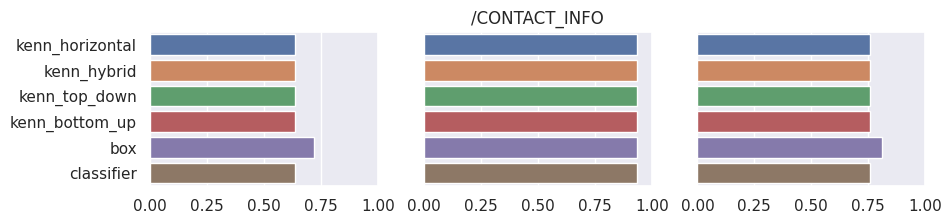

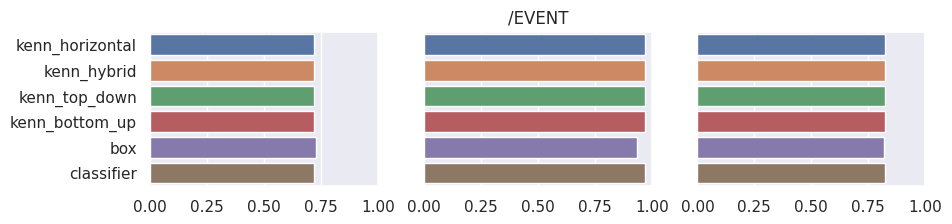

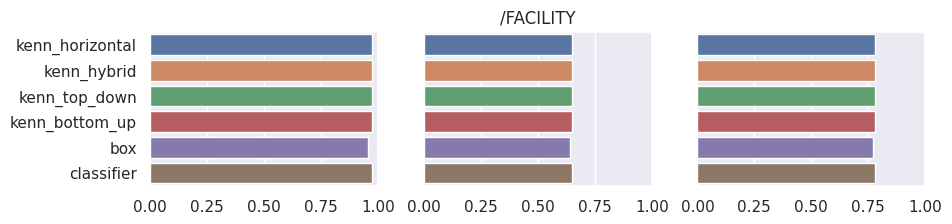

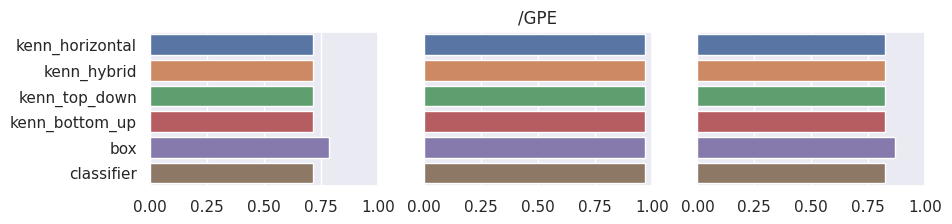

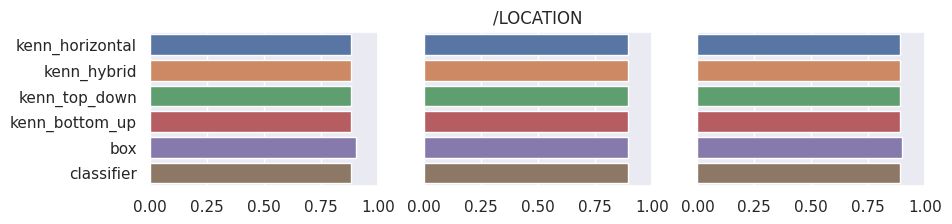

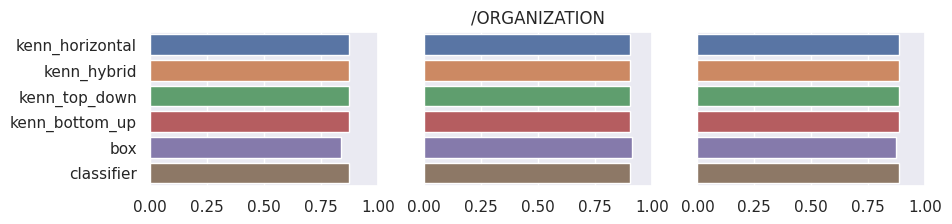

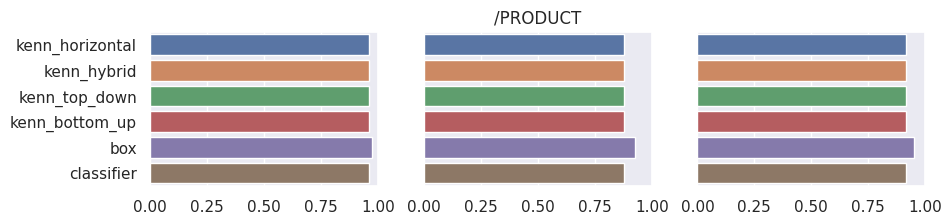

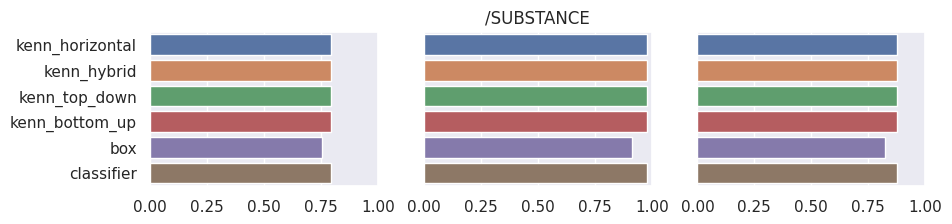

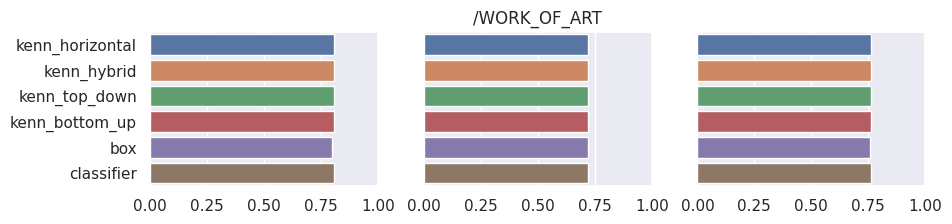

In [4]:
for family in FAMILY[DATA]:
    row_filter = {
    'family' : family,
    'subset' : 10,
    'instance': 0,
    'metric' : f'test_incremental_{family}/macro_types'
    }
    df_filtered = filter_df(df_metrics, row_filter)
    title = f'/{family}'
    plot_family(df_filtered, title)

## Family over subsets

### Macro types
**metric:** test_incremental_only/macro_types

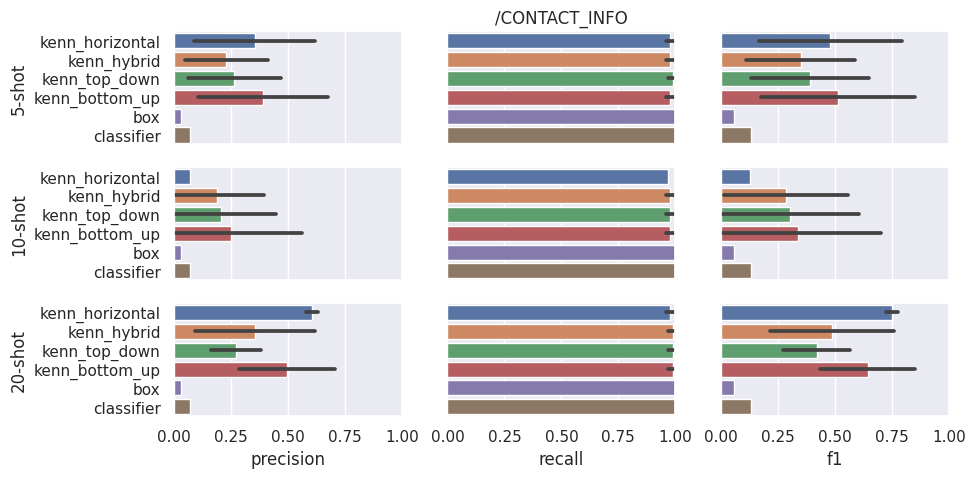

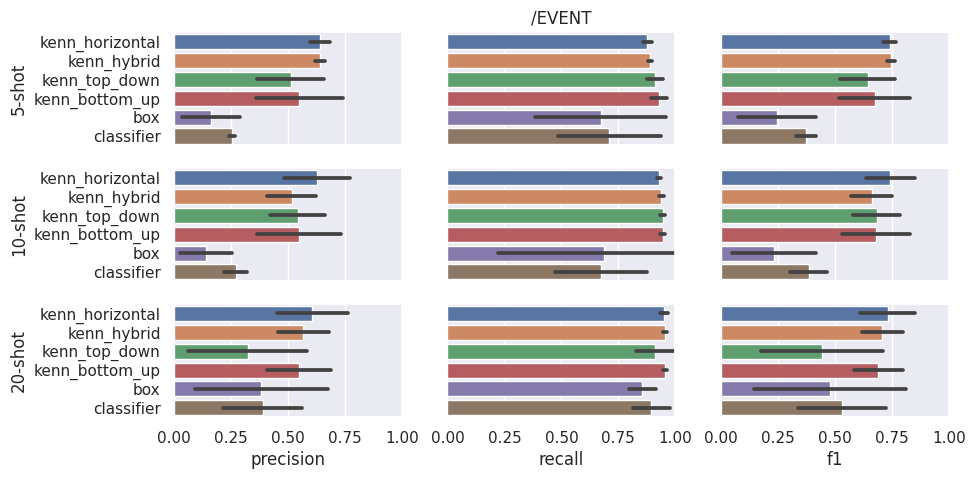

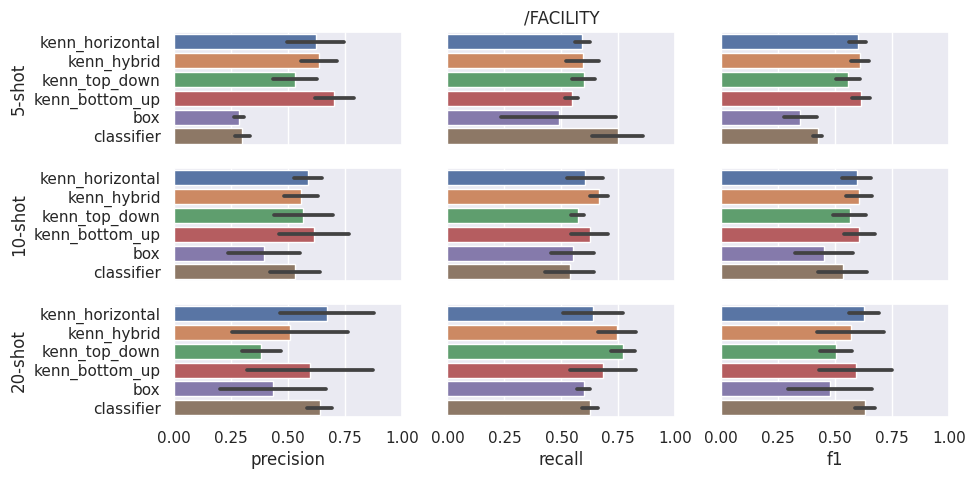

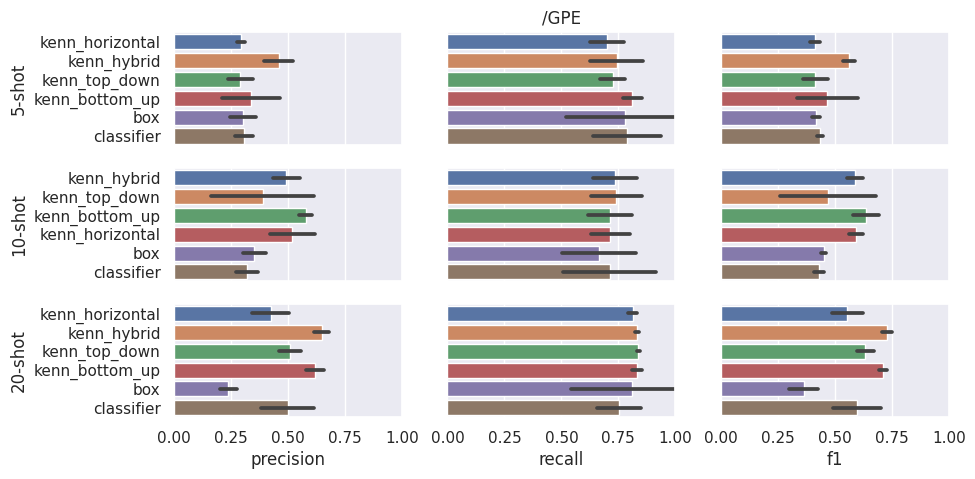

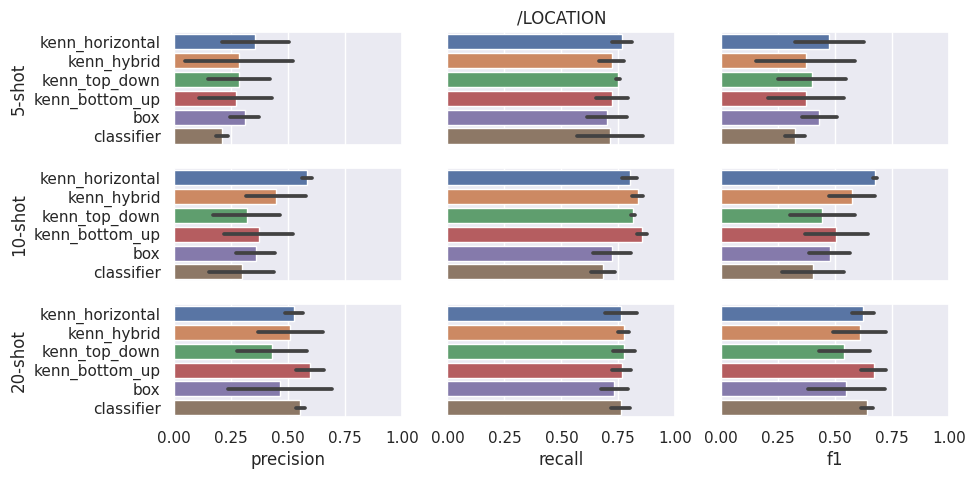

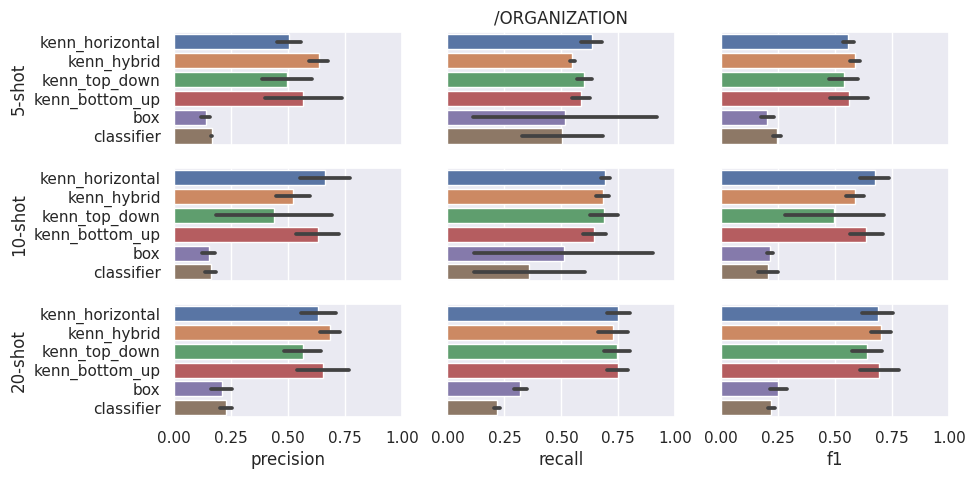

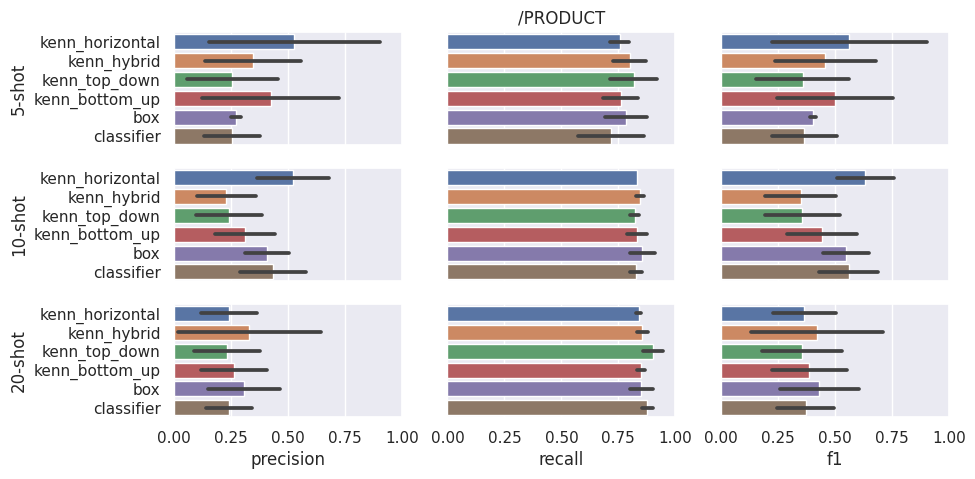

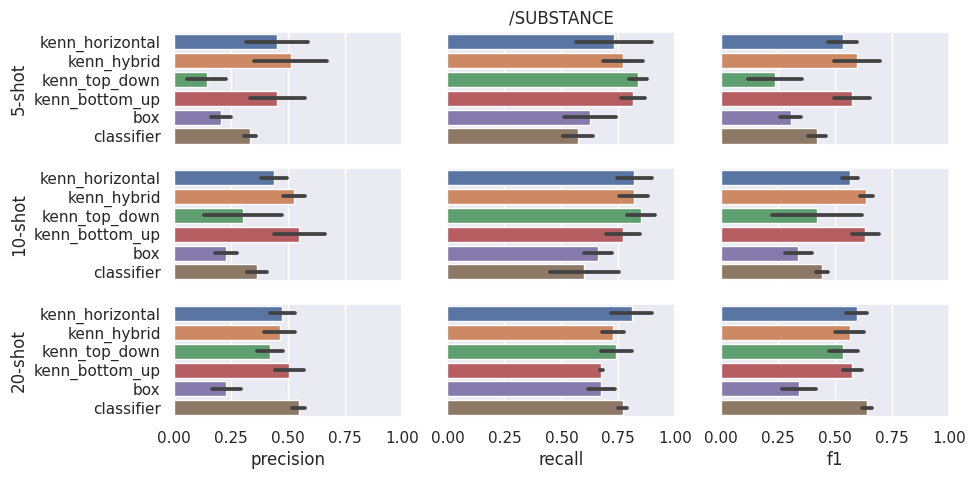

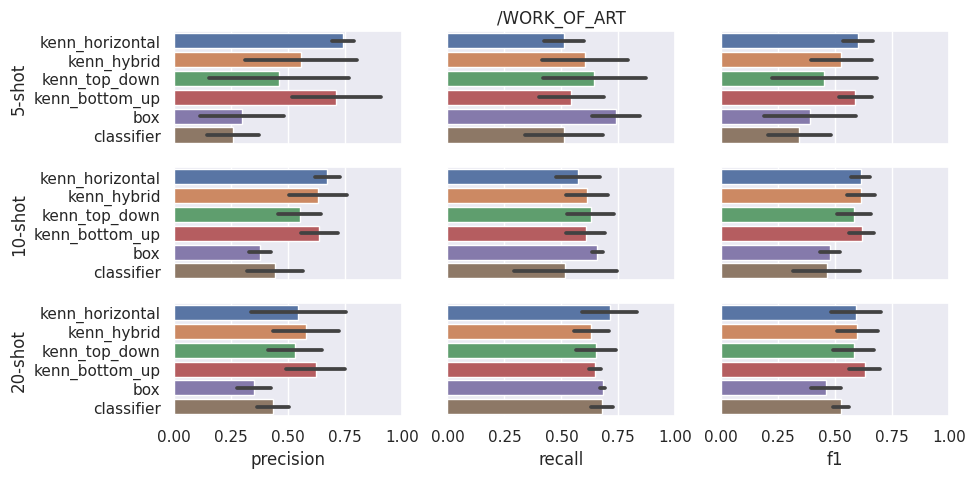

In [5]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_subsets(df_filtered, title=title)



### Macro example
**metric:** test_incremental_only/macro_example_exclusive

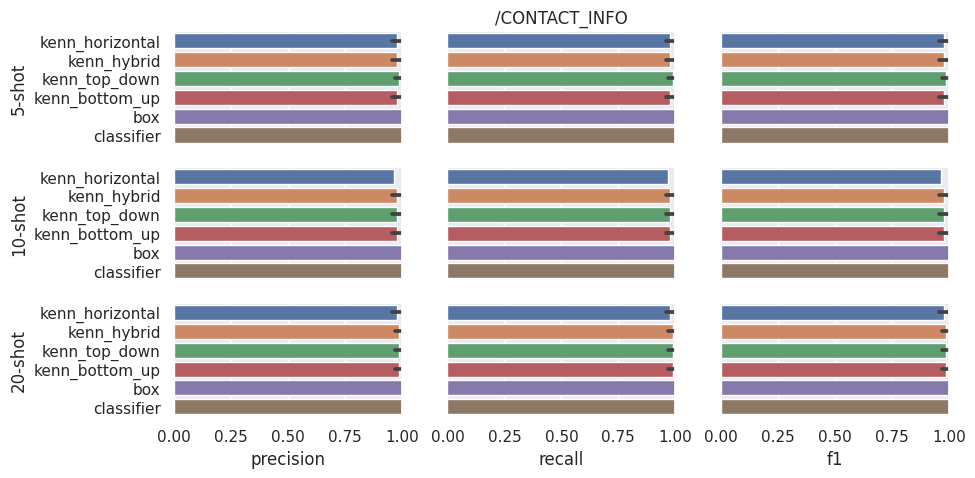

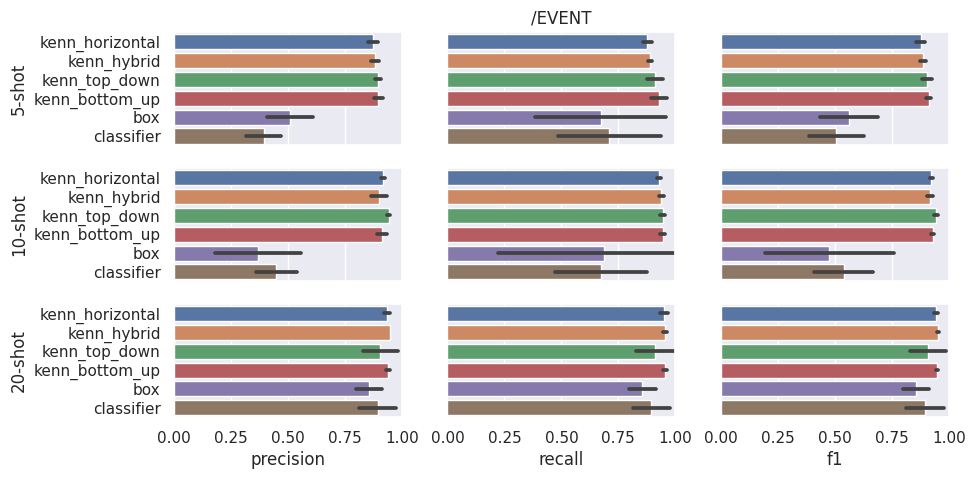

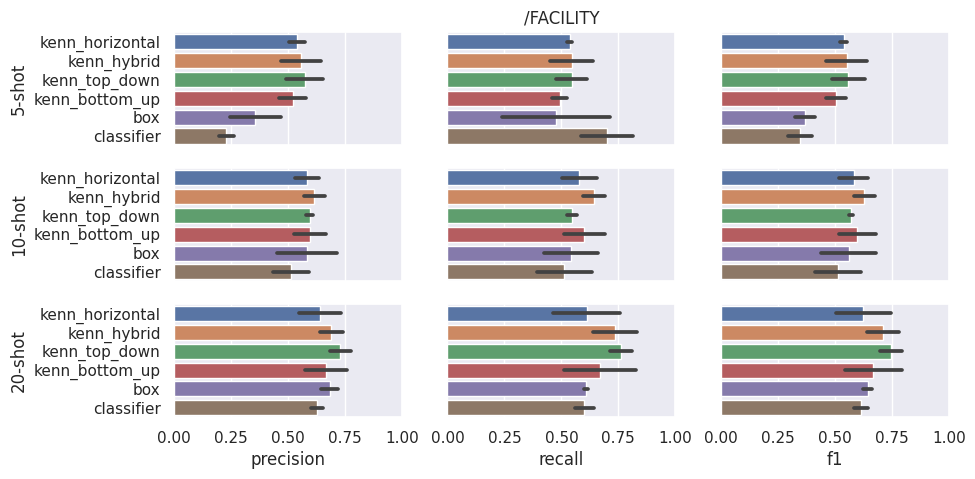

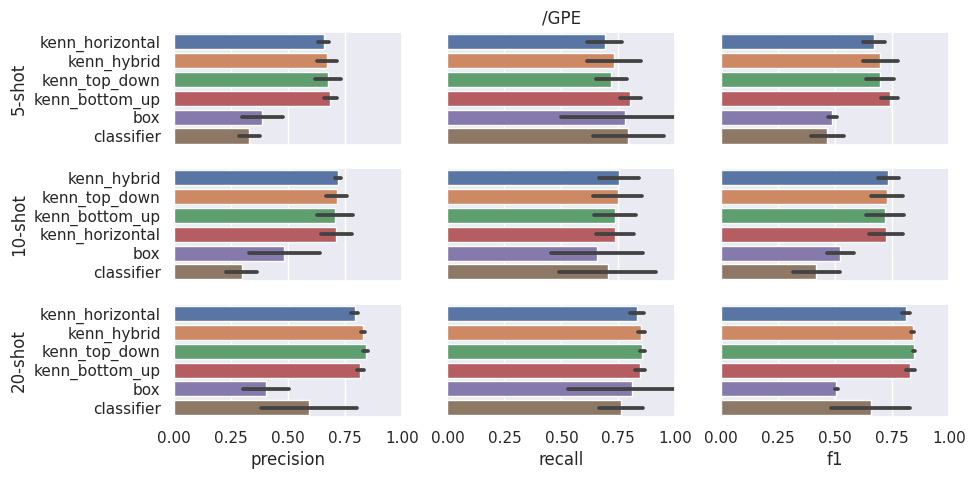

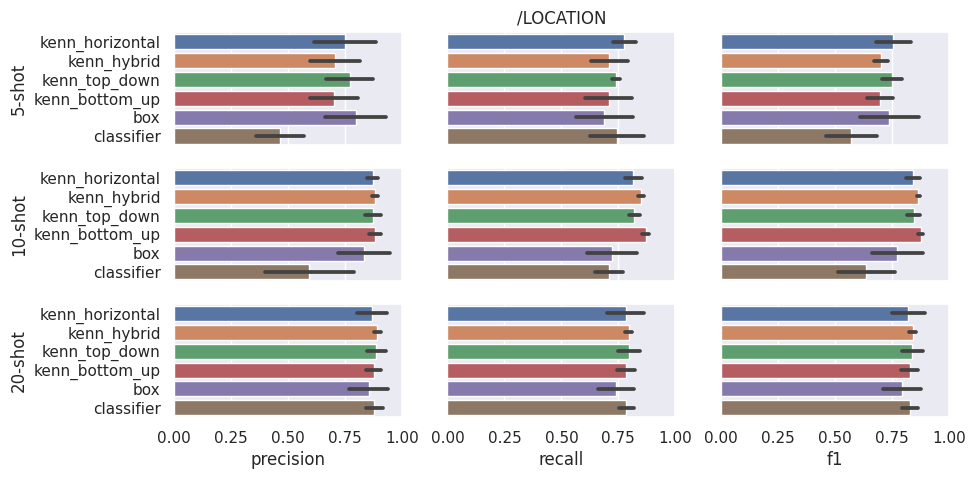

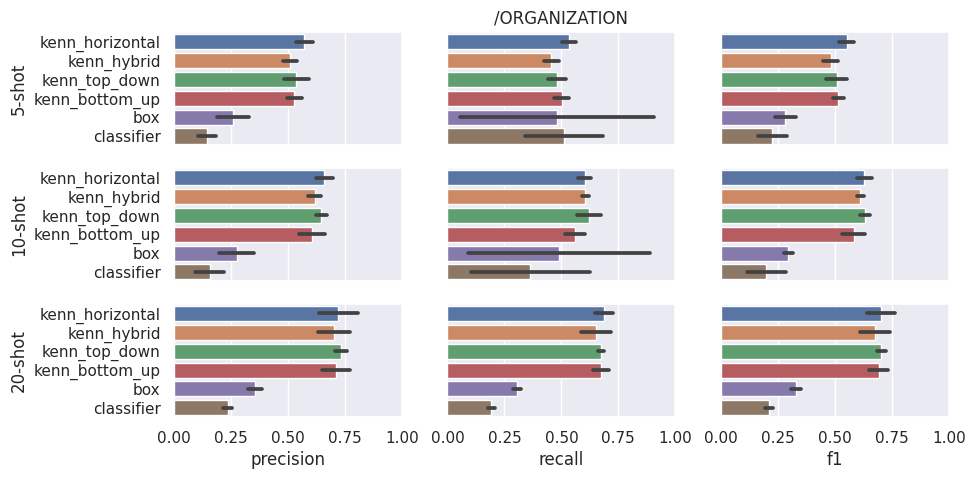

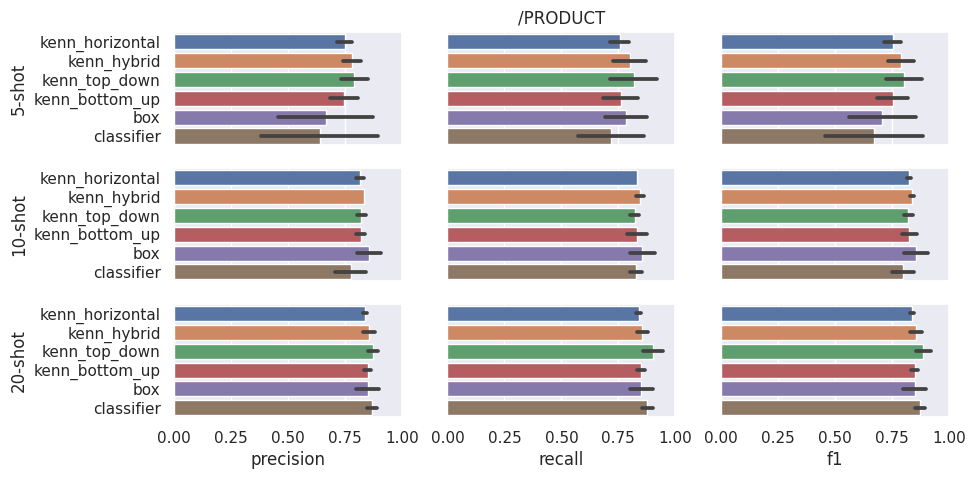

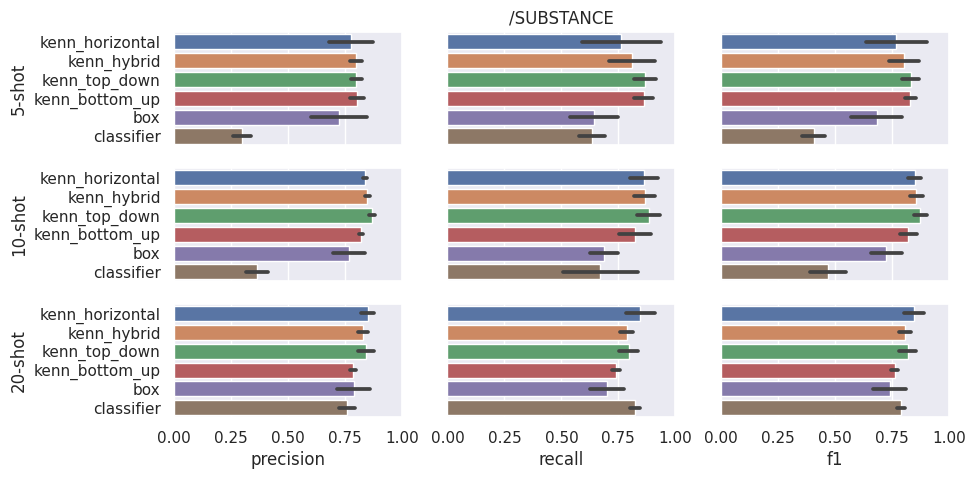

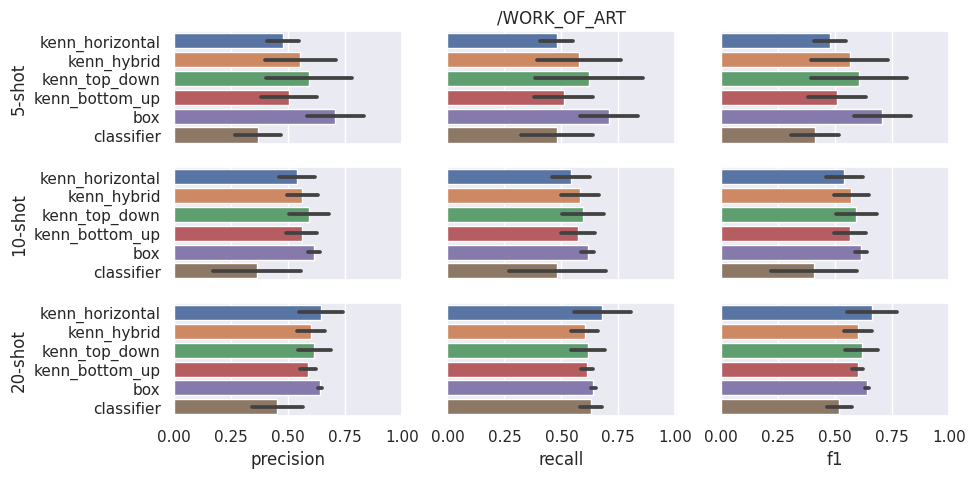

In [6]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'metric' : 'test_incremental_only/macro_example_exclusive'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_subsets(df_filtered, title=title)



### Macro types for each type
**metric:** test_incremental_{family}-{subtype}/macro_types

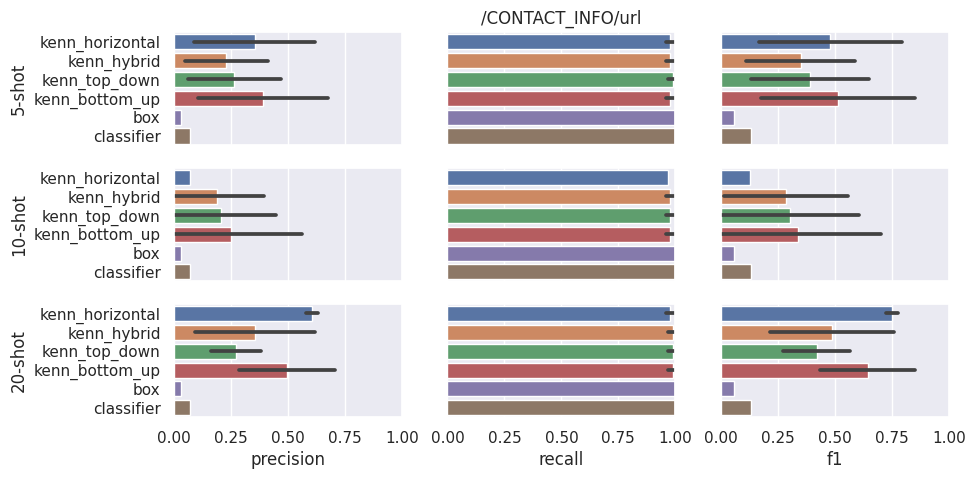

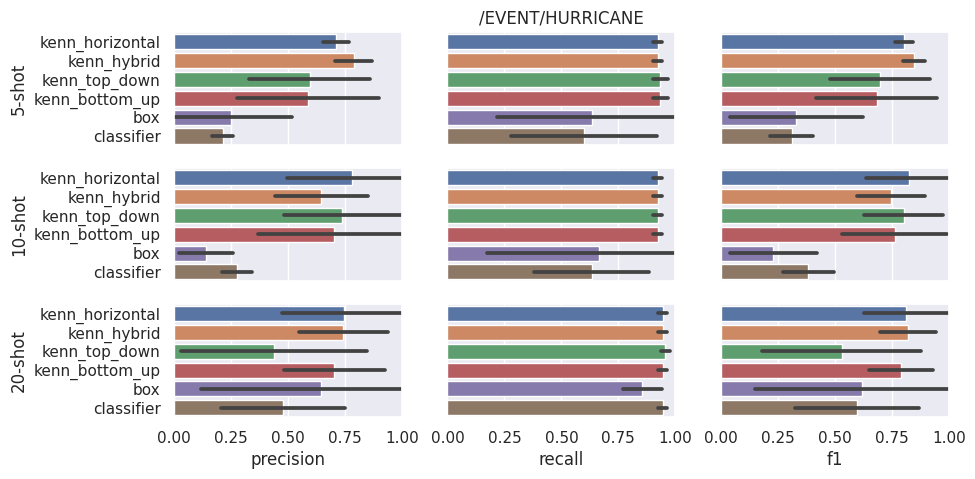

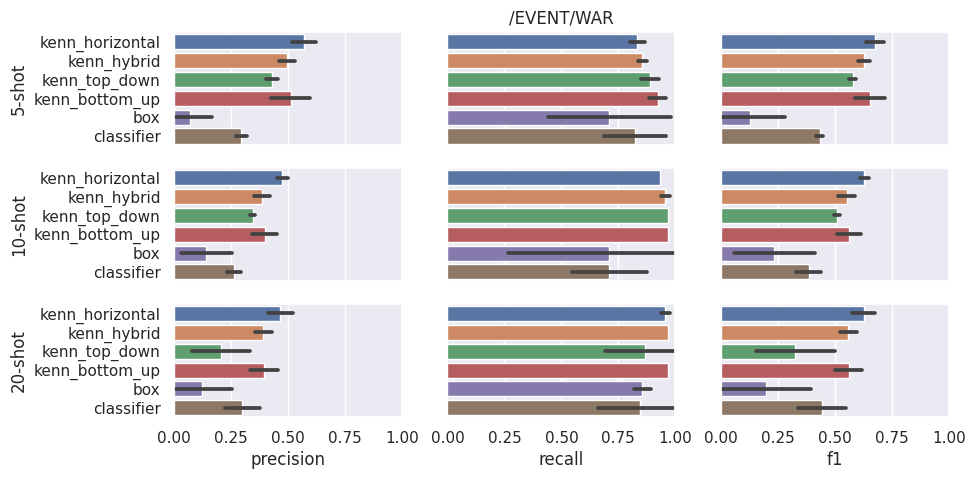

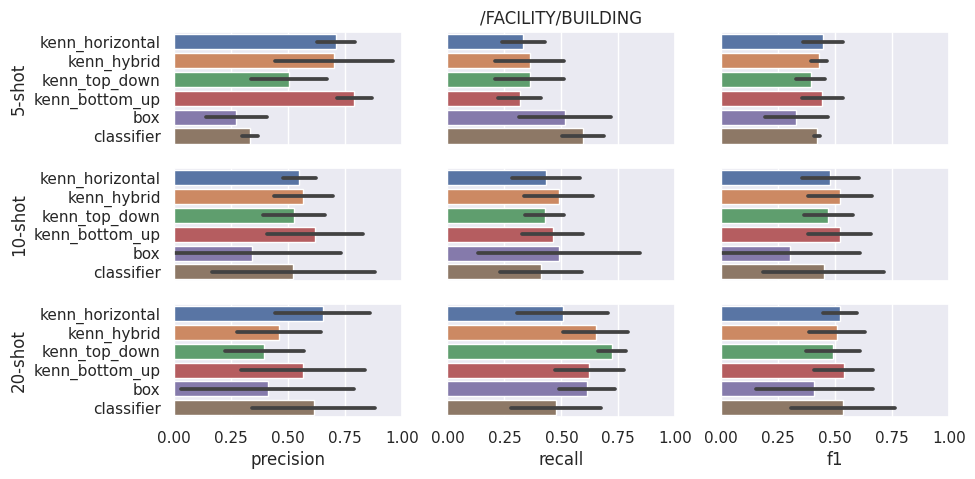

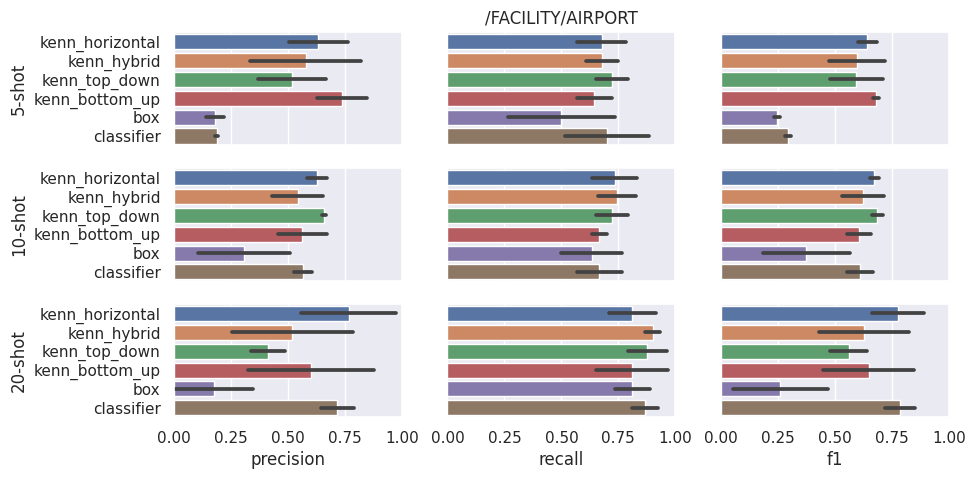

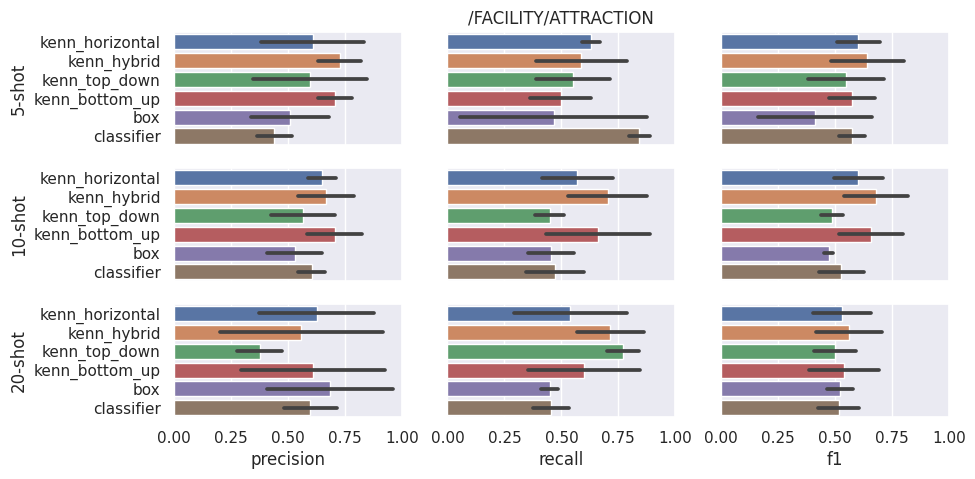

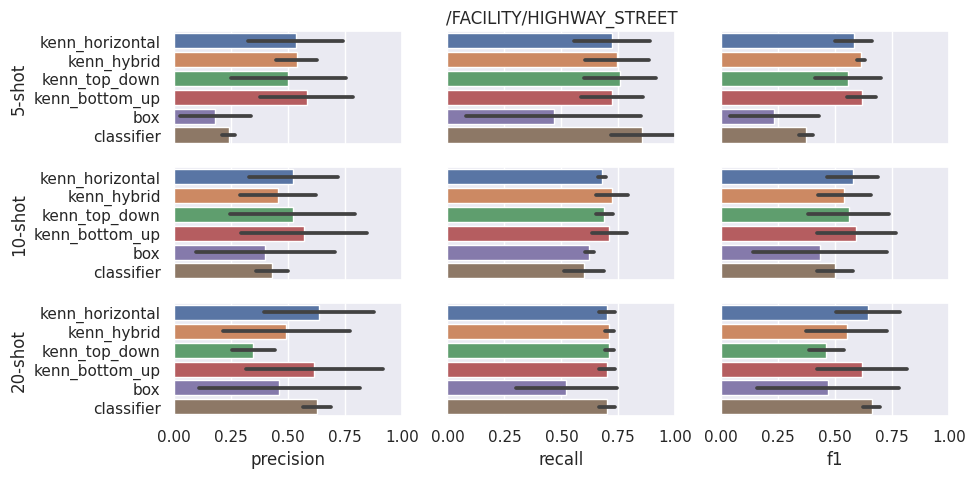

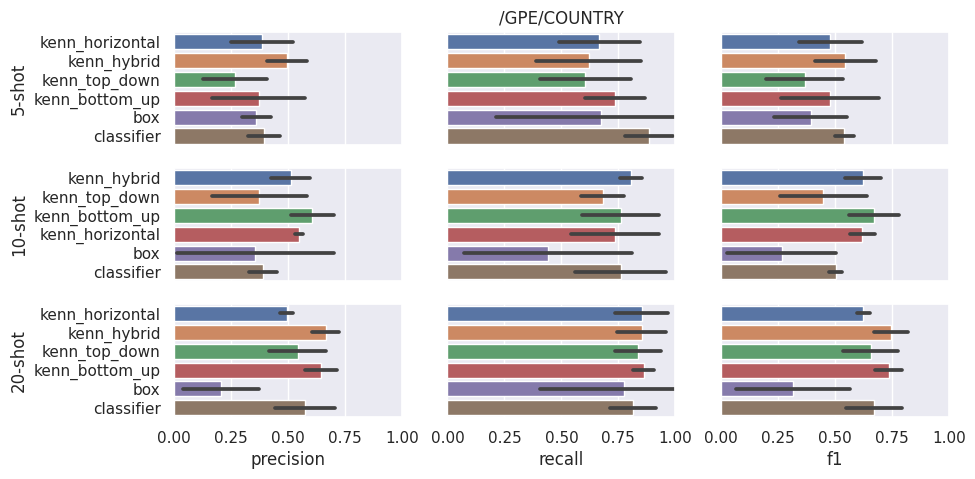

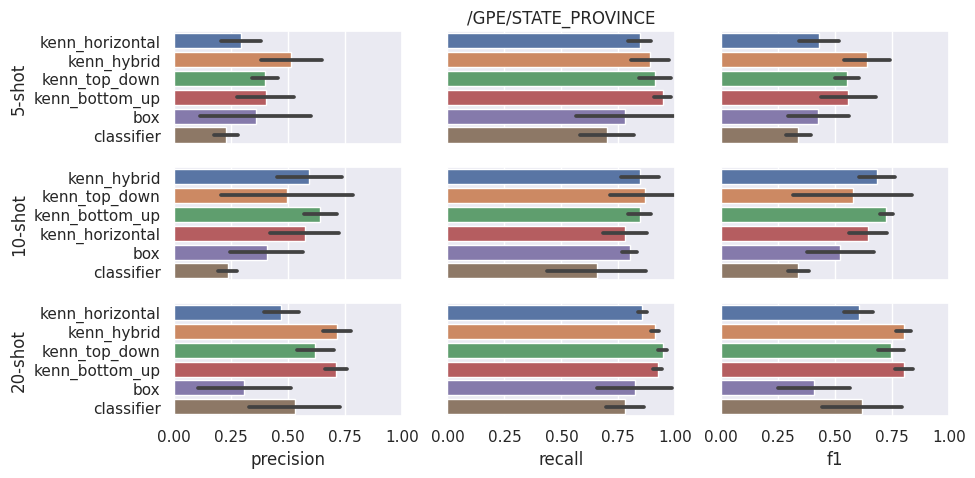

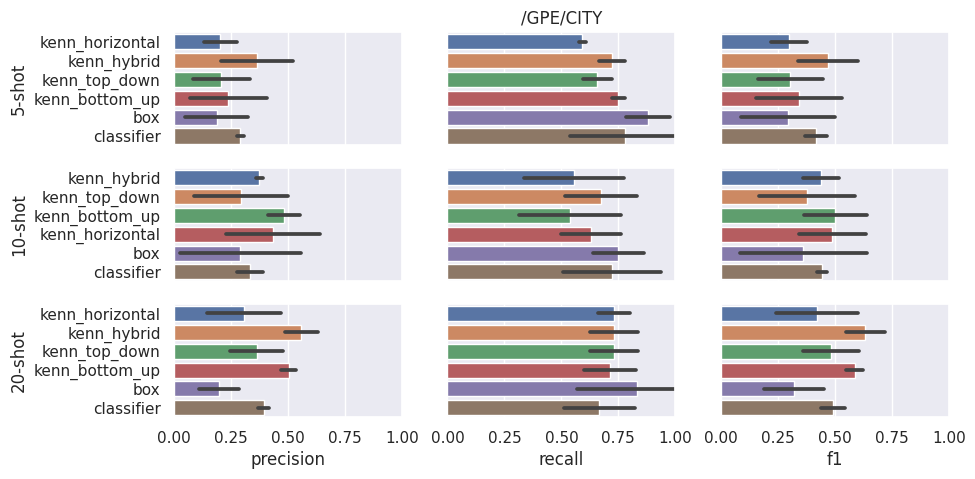

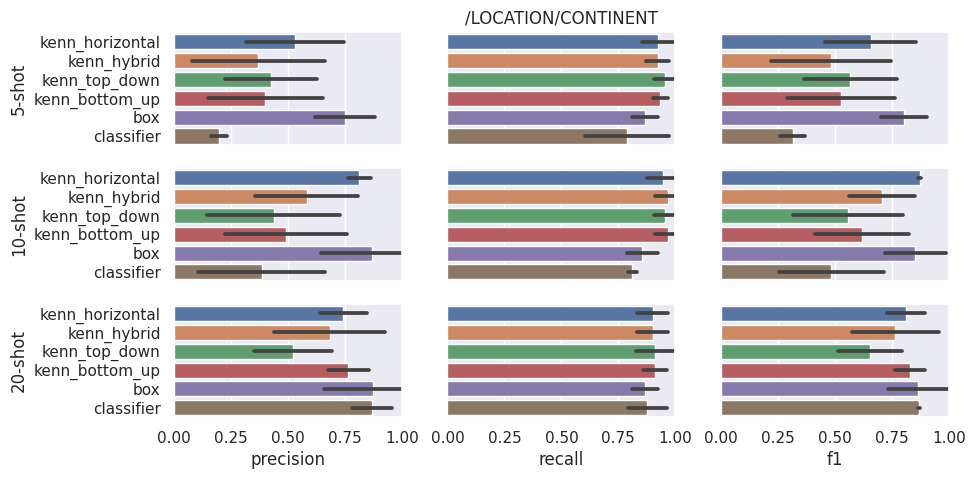

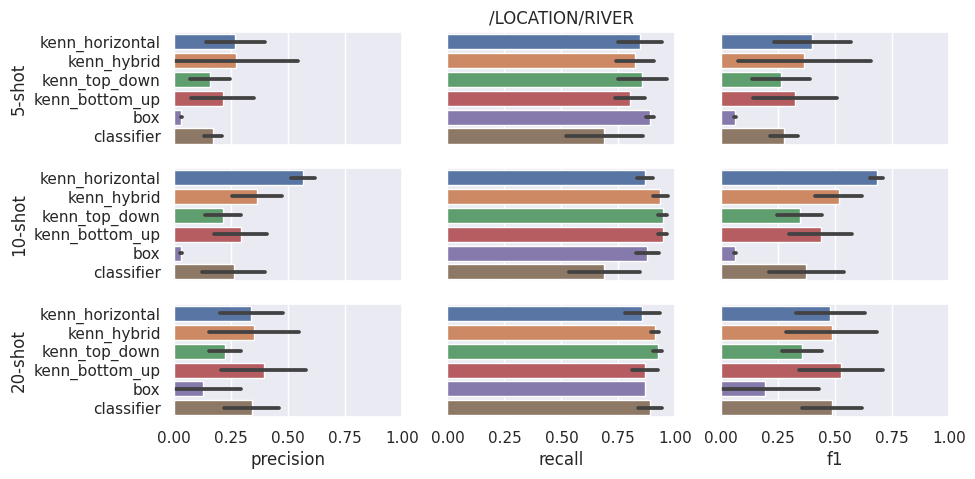

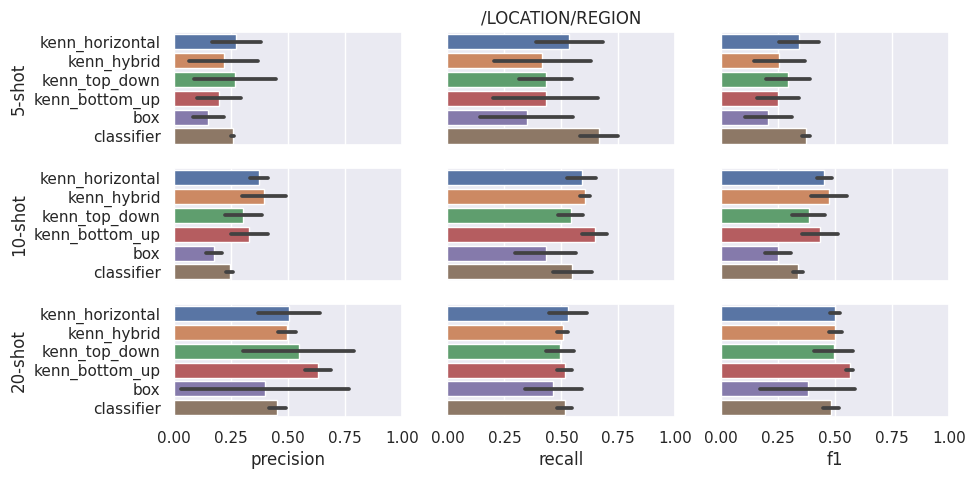

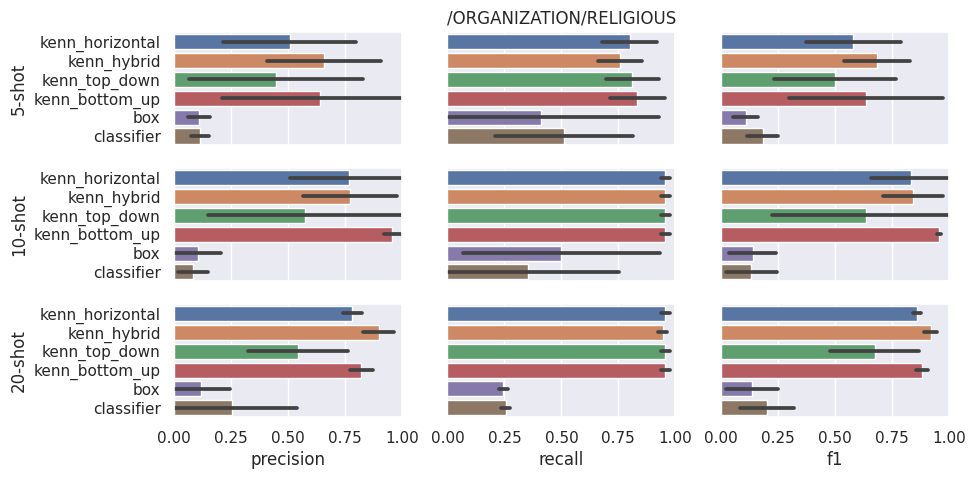

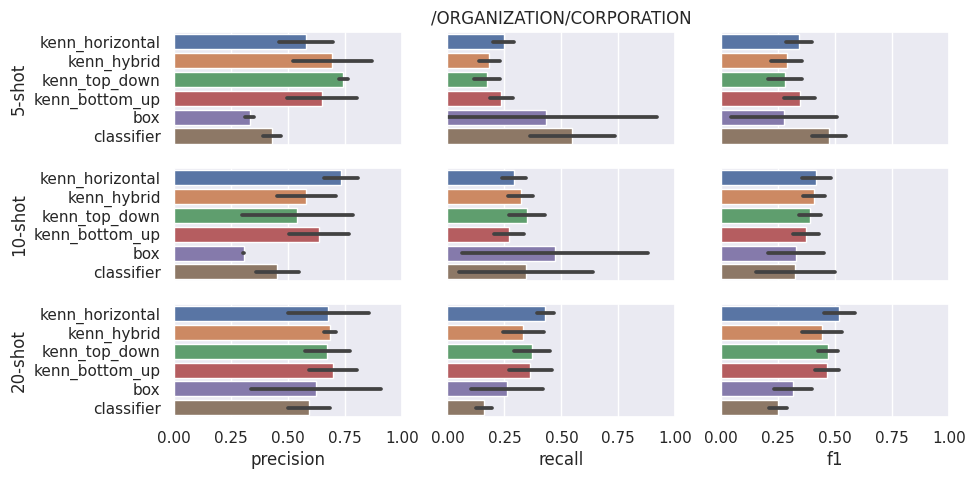

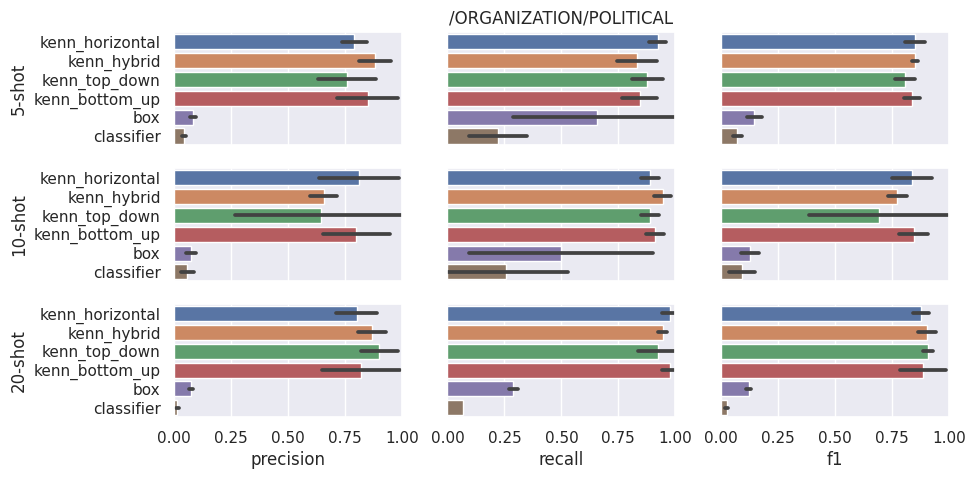

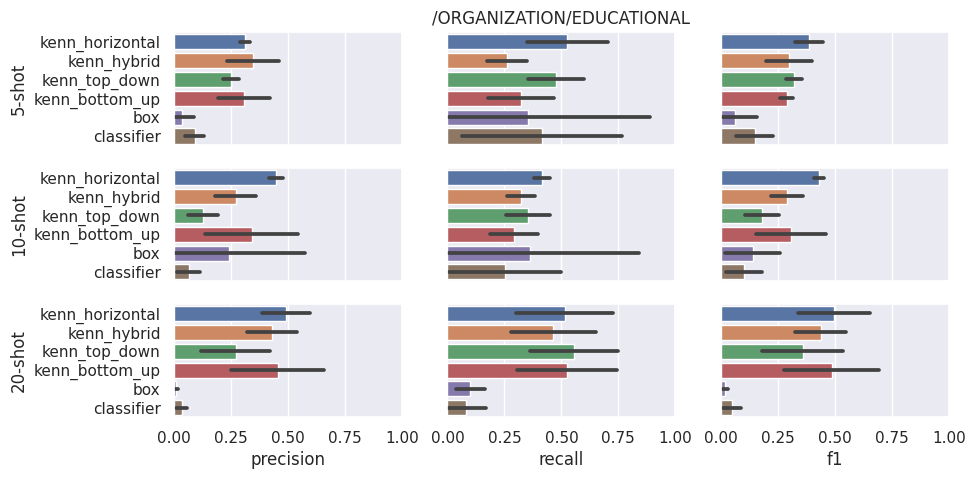

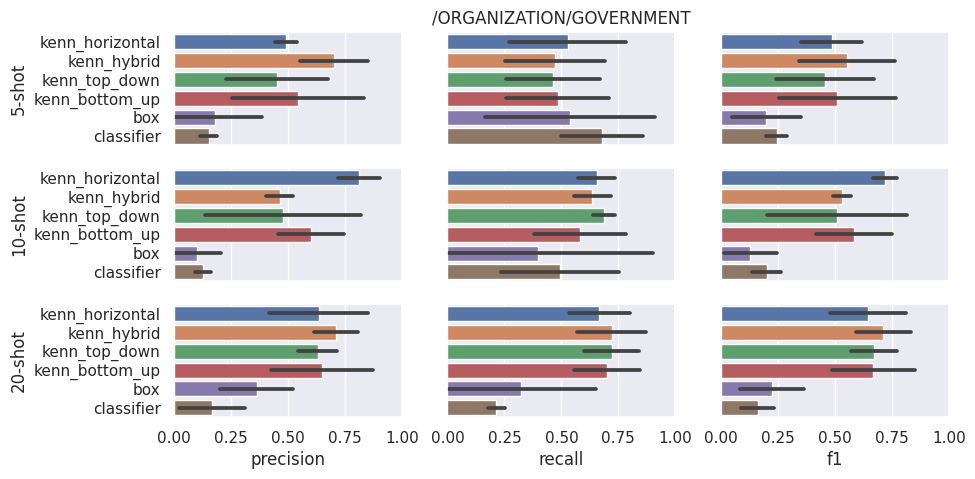

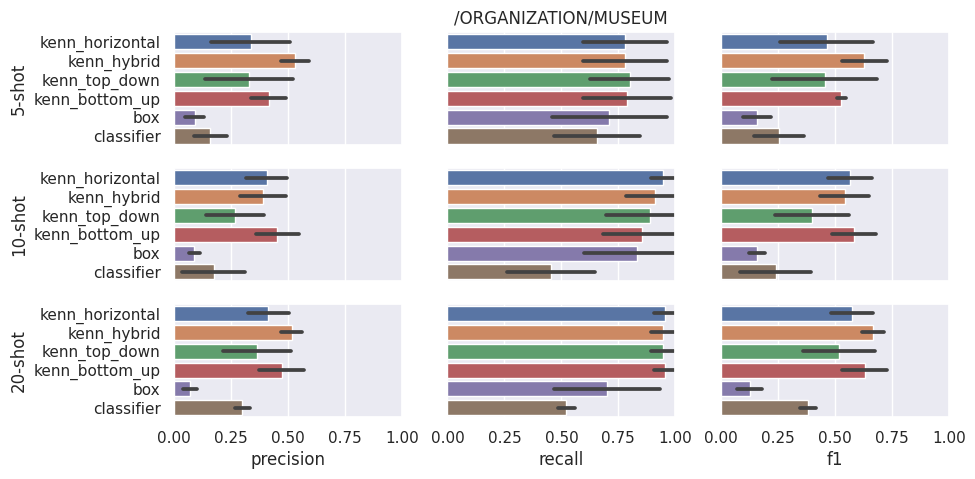

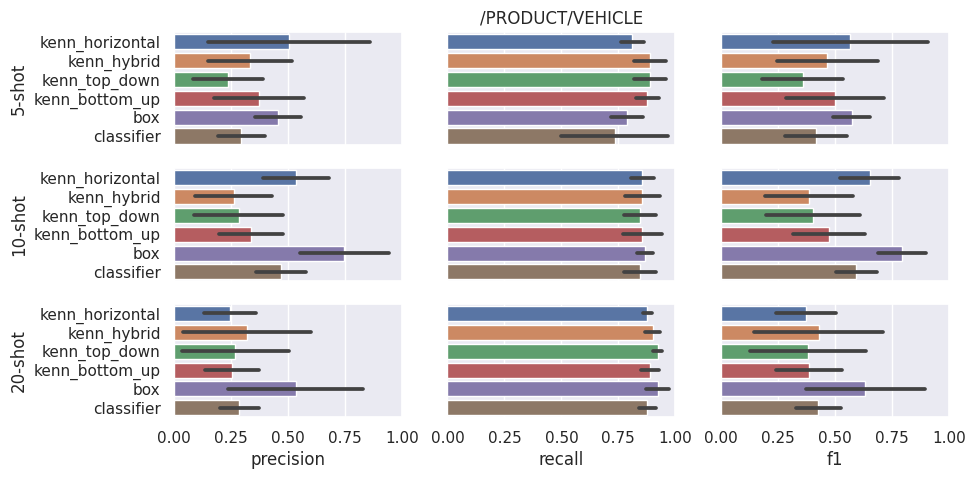

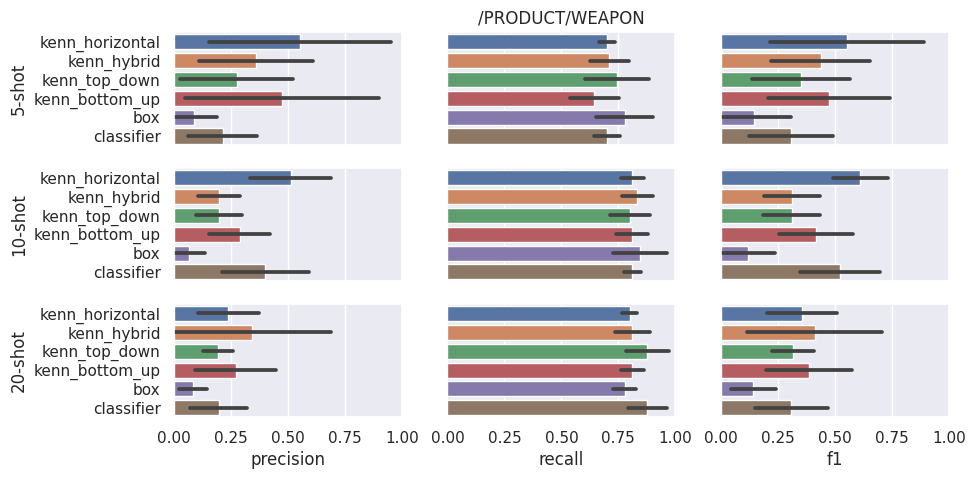

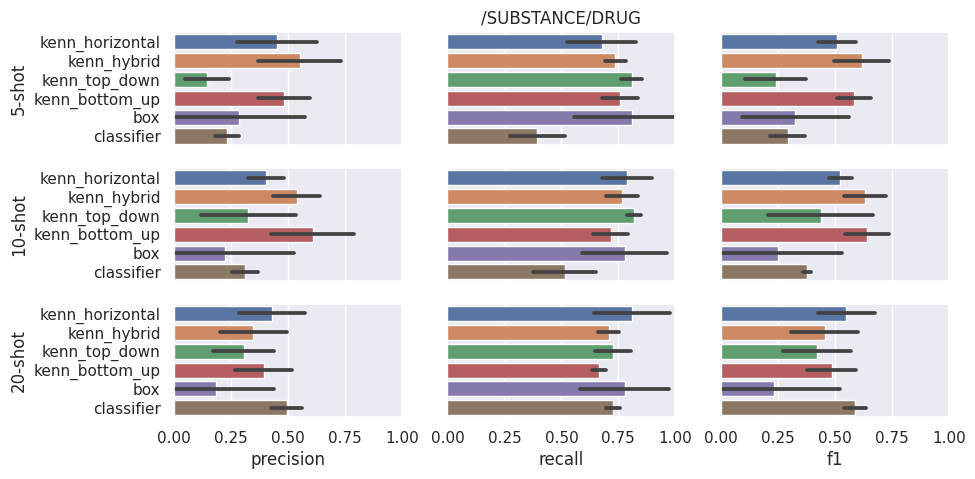

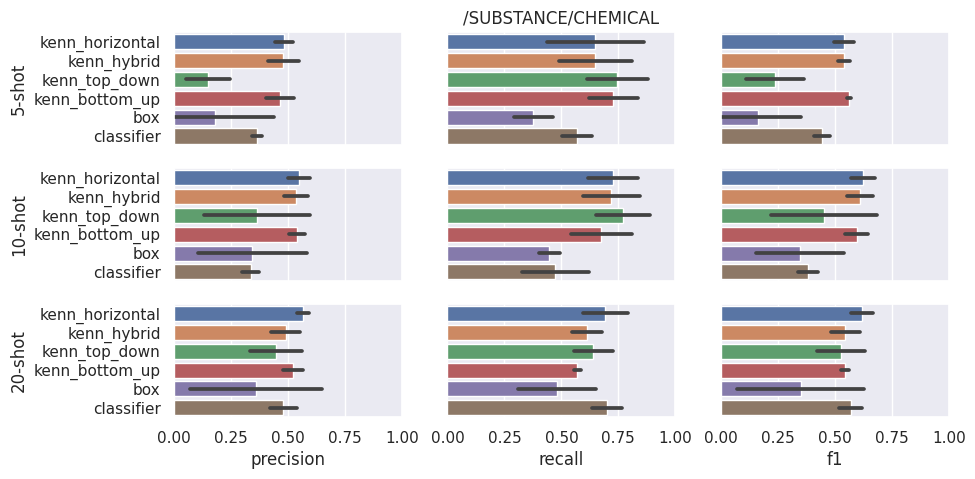

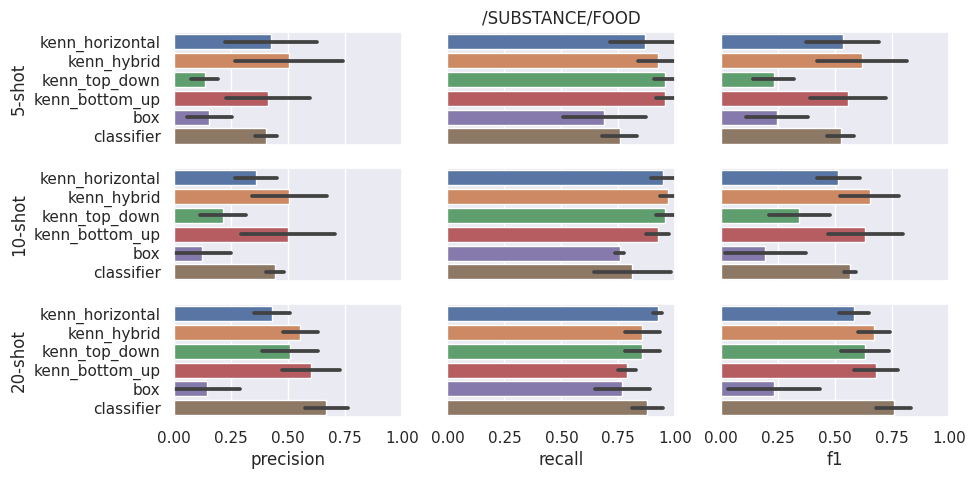

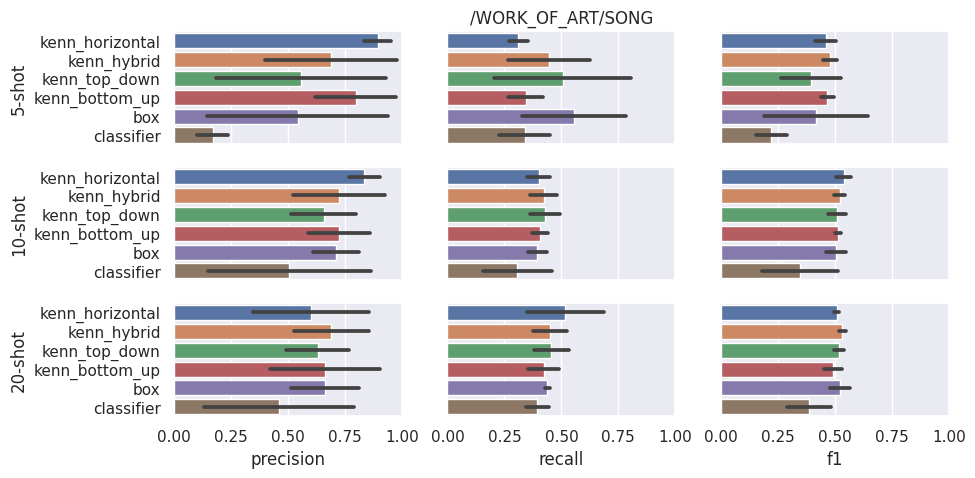

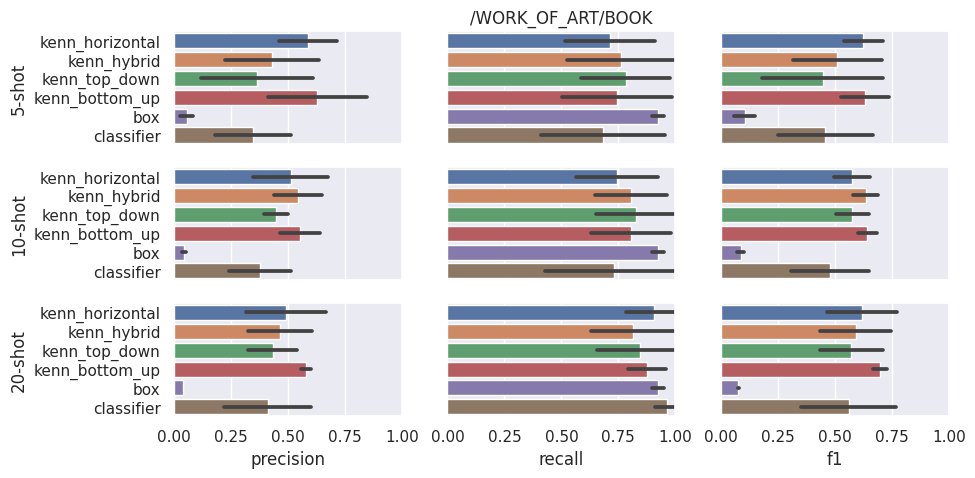

In [7]:
for family in FAMILY[DATA]:
  # print('_'*50)
  metrics = set(df_metrics[df_metrics['metric'].apply(lambda x: x.startswith(f'test_incremental_{family}-'))]['metric'])
  for metric in metrics:
    row_filter = {
    'family' : family,
    'metric' : metric
    }
    df_filtered = filter_df(df_metrics, row_filter)
    # print('_'*50)
    # print(family)
    subtype = metric.split('-')[-1].split('/')[0]
    title = f'/{family}/{subtype}'
    plot_subsets(df_filtered, title=title)



## Subset 10 (5-shot)

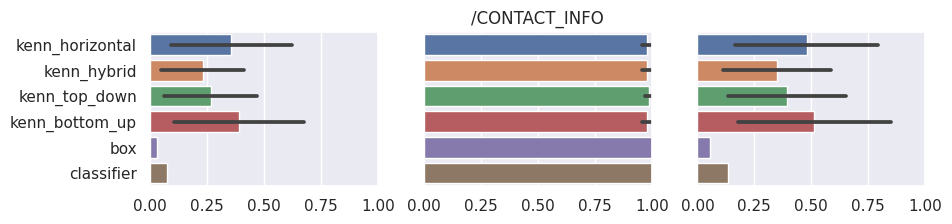

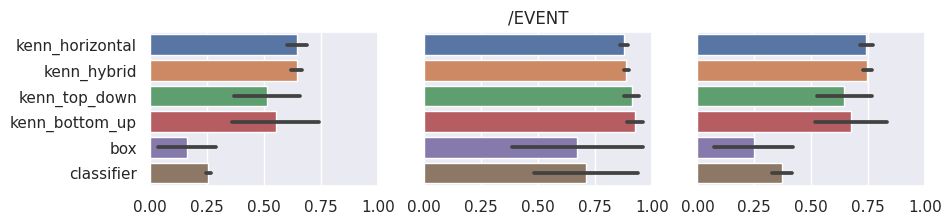

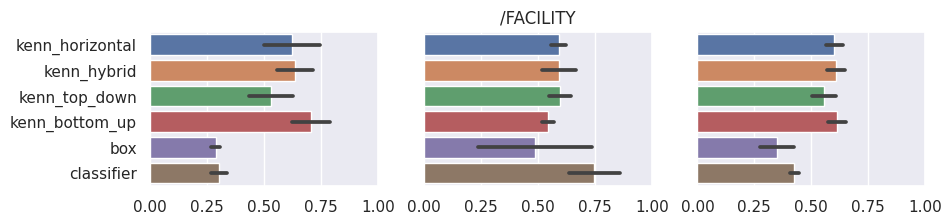

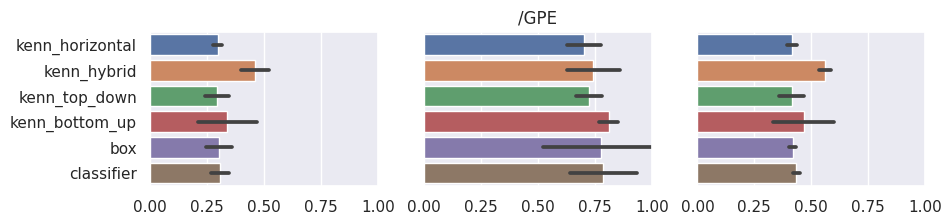

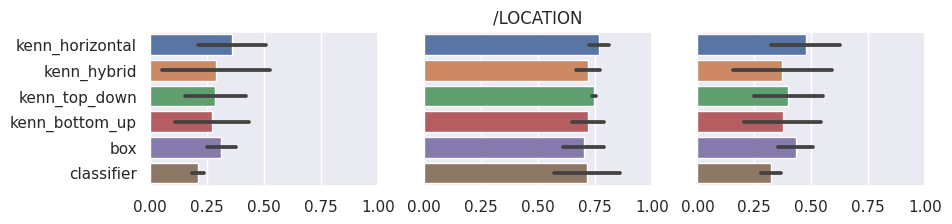

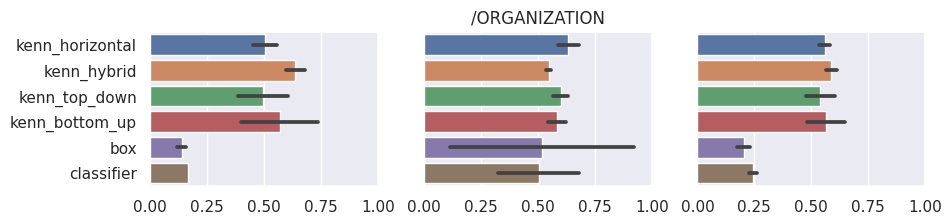

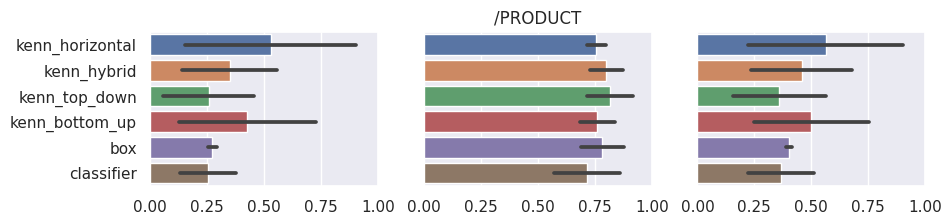

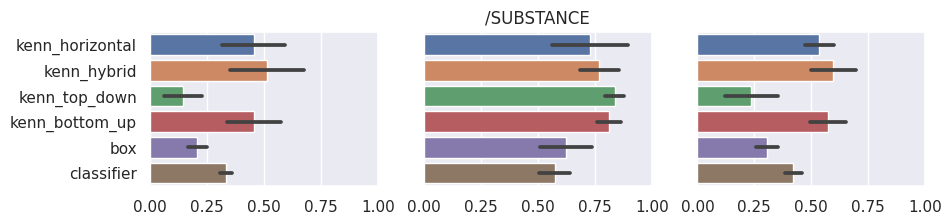

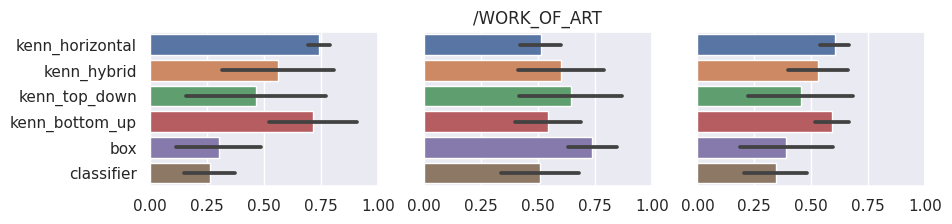

In [8]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'subset' : 10,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_family(df_filtered, title=title)



## Subset 20 (10-shot)

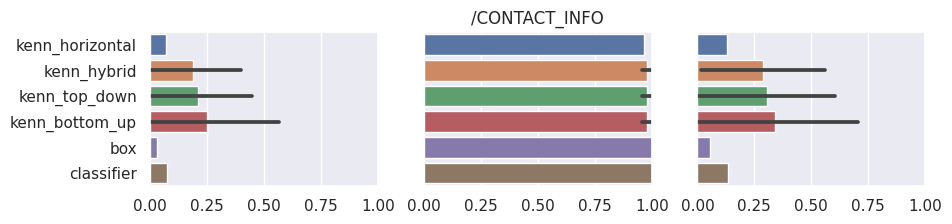

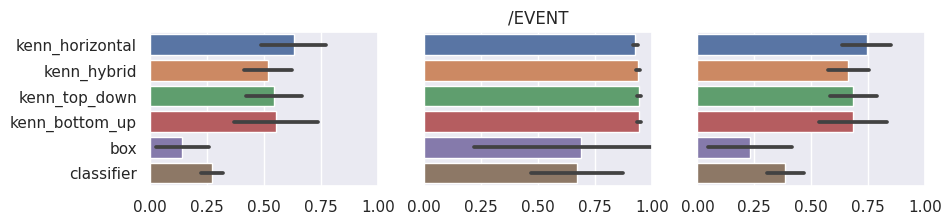

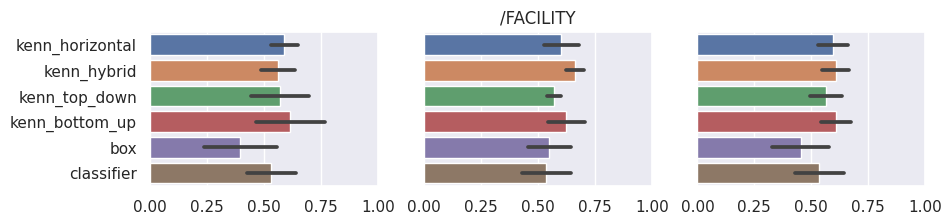

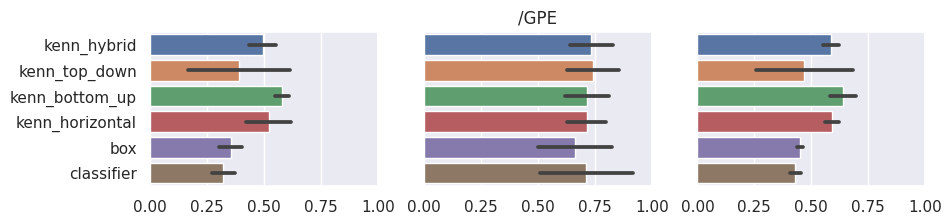

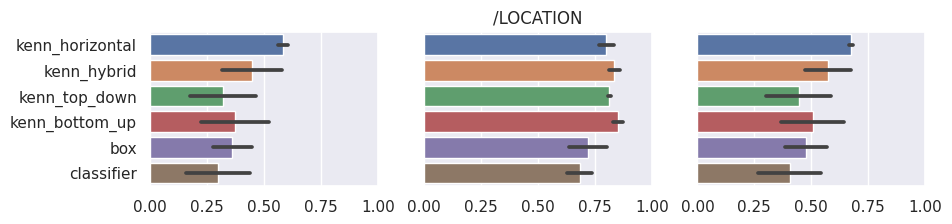

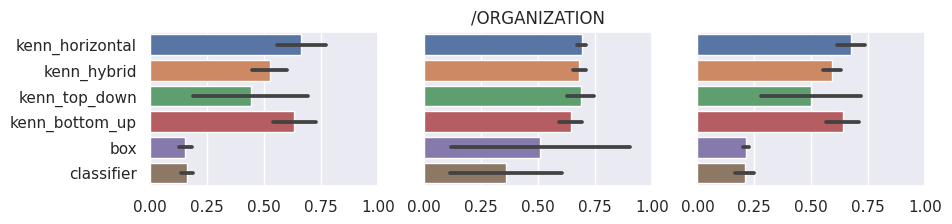

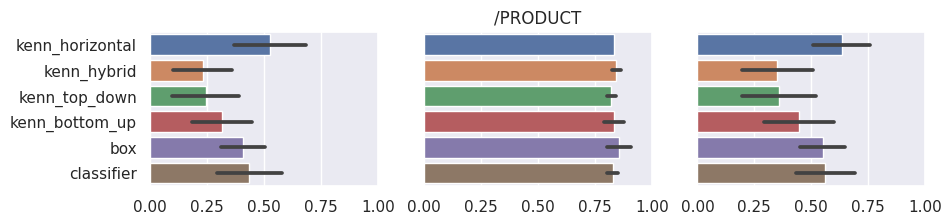

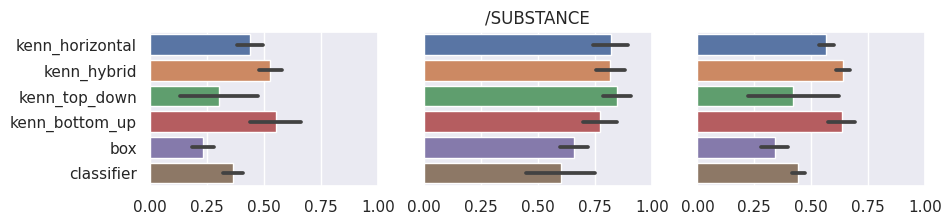

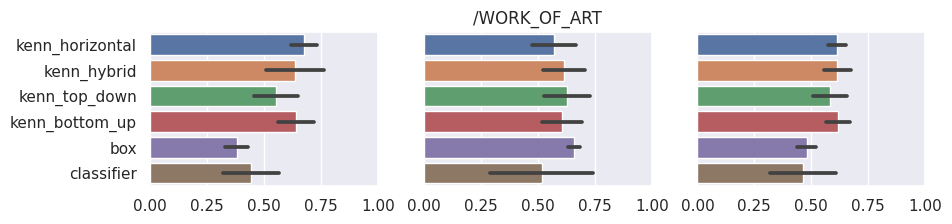

In [9]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'subset' : 20,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_family(df_filtered, title=title)



## Subset 40 (20-shot)

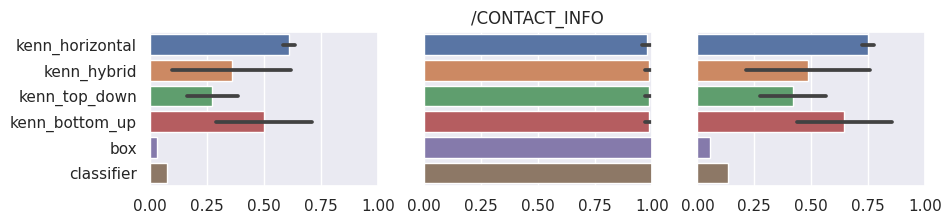

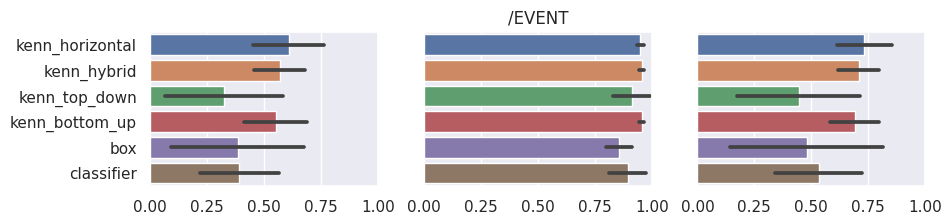

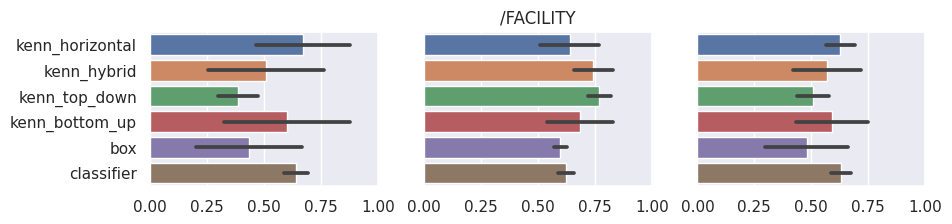

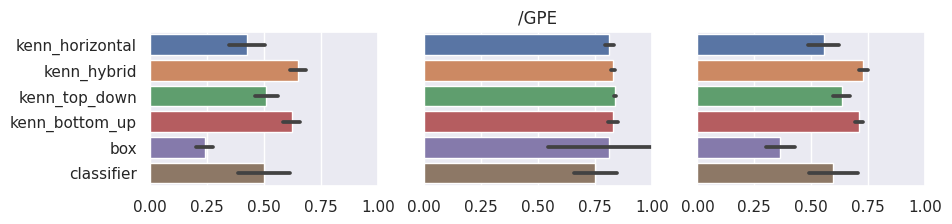

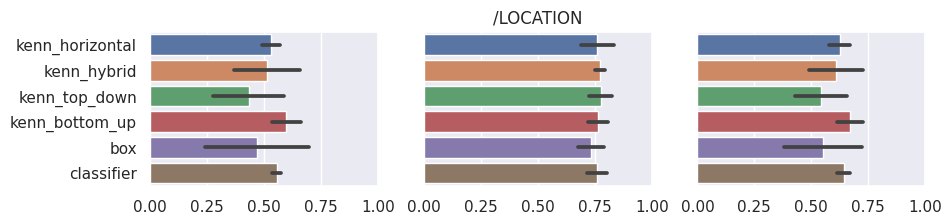

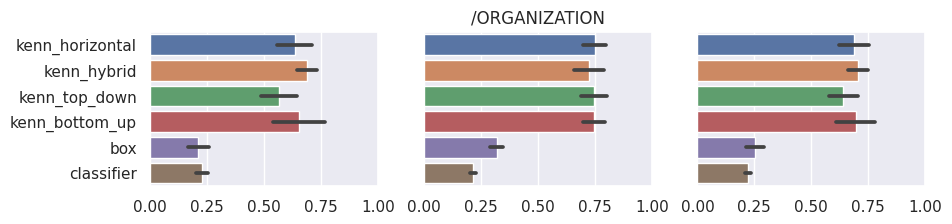

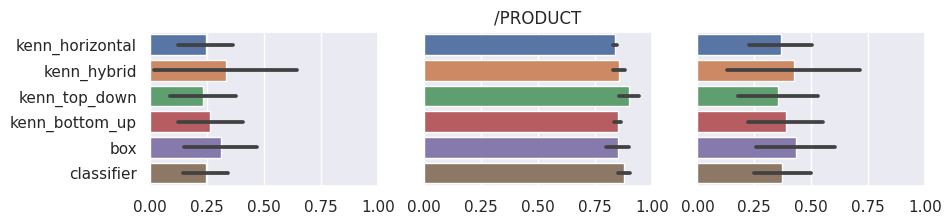

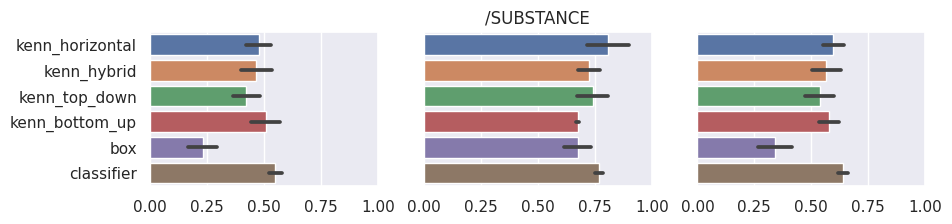

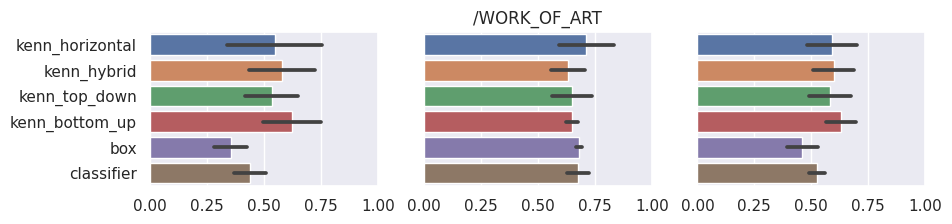

In [10]:
for family in FAMILY[DATA]:
  row_filter = {
  'family' : family,
  'subset' : 40,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  # print('_'*50)
  # print(family)
  title = f'/{family}'
  plot_family(df_filtered, title=title)



## Summary

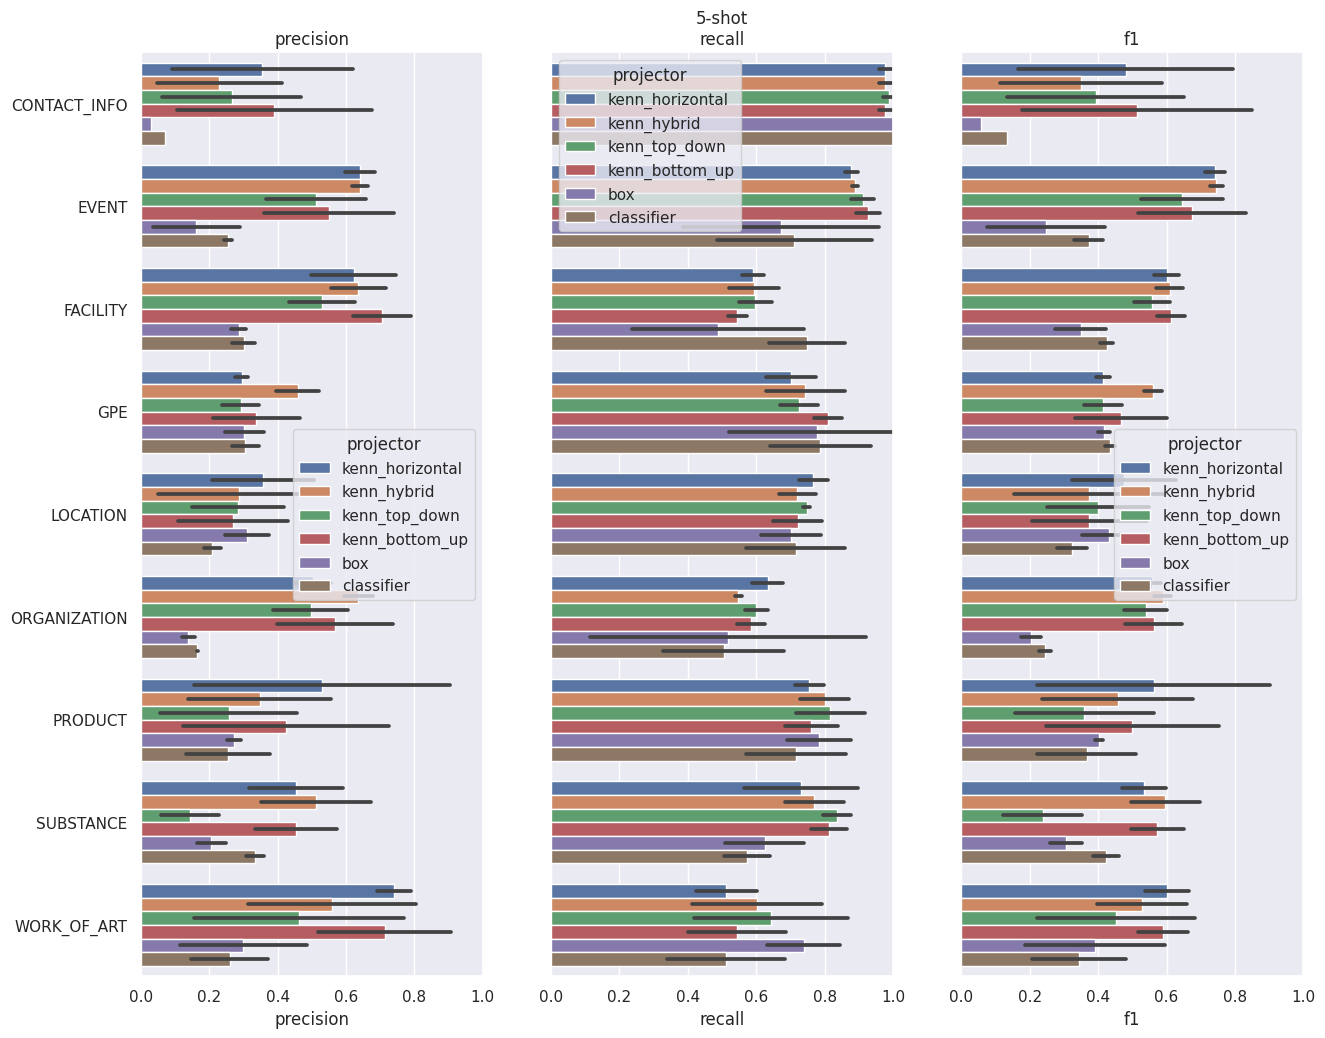

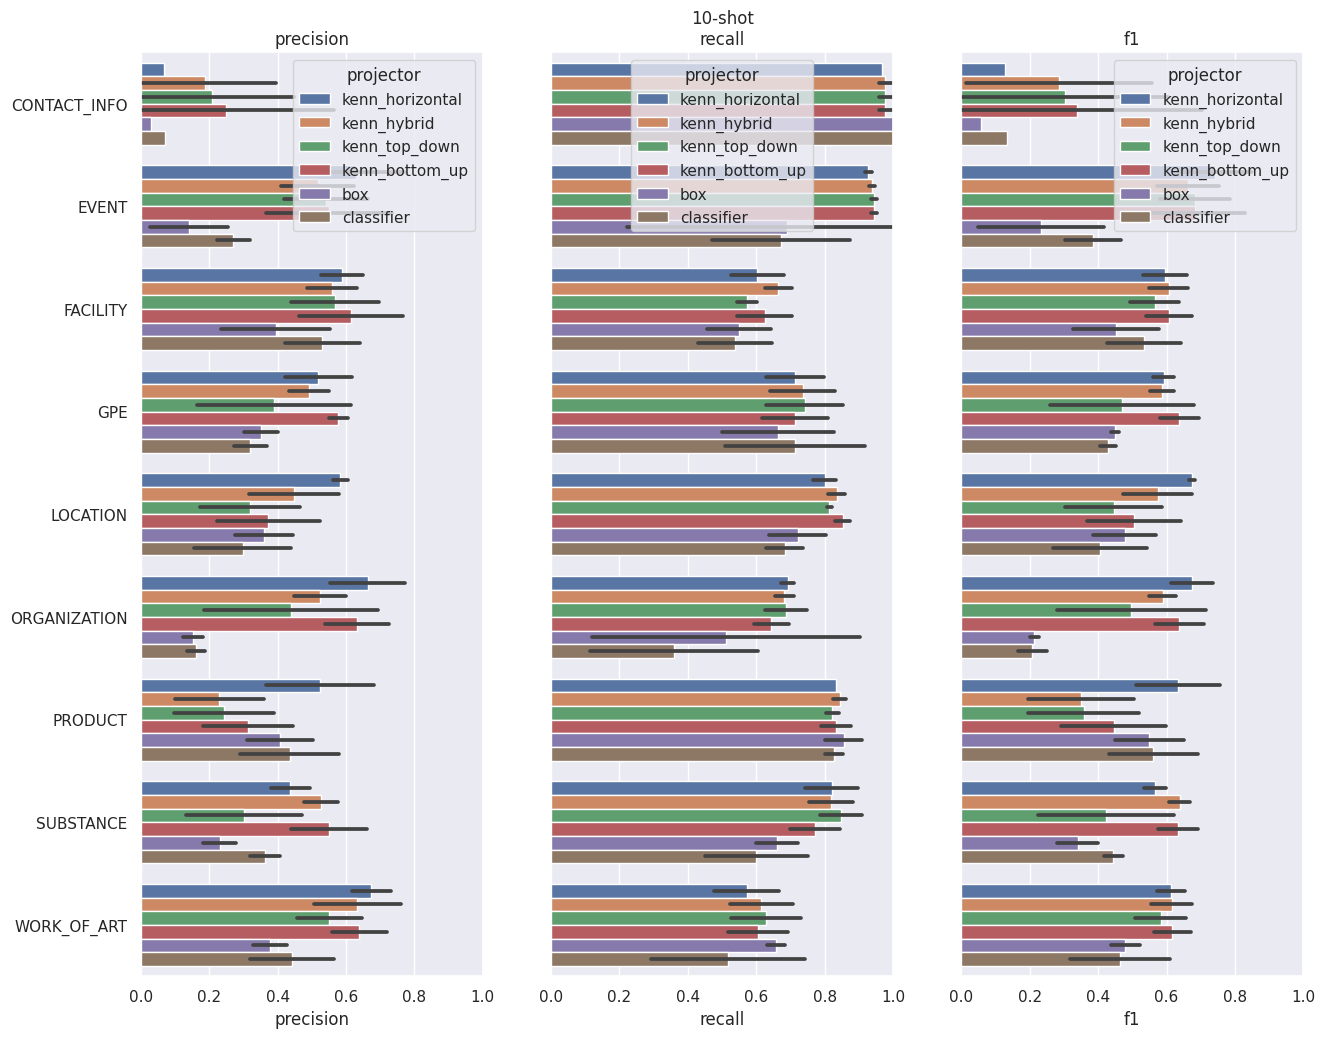

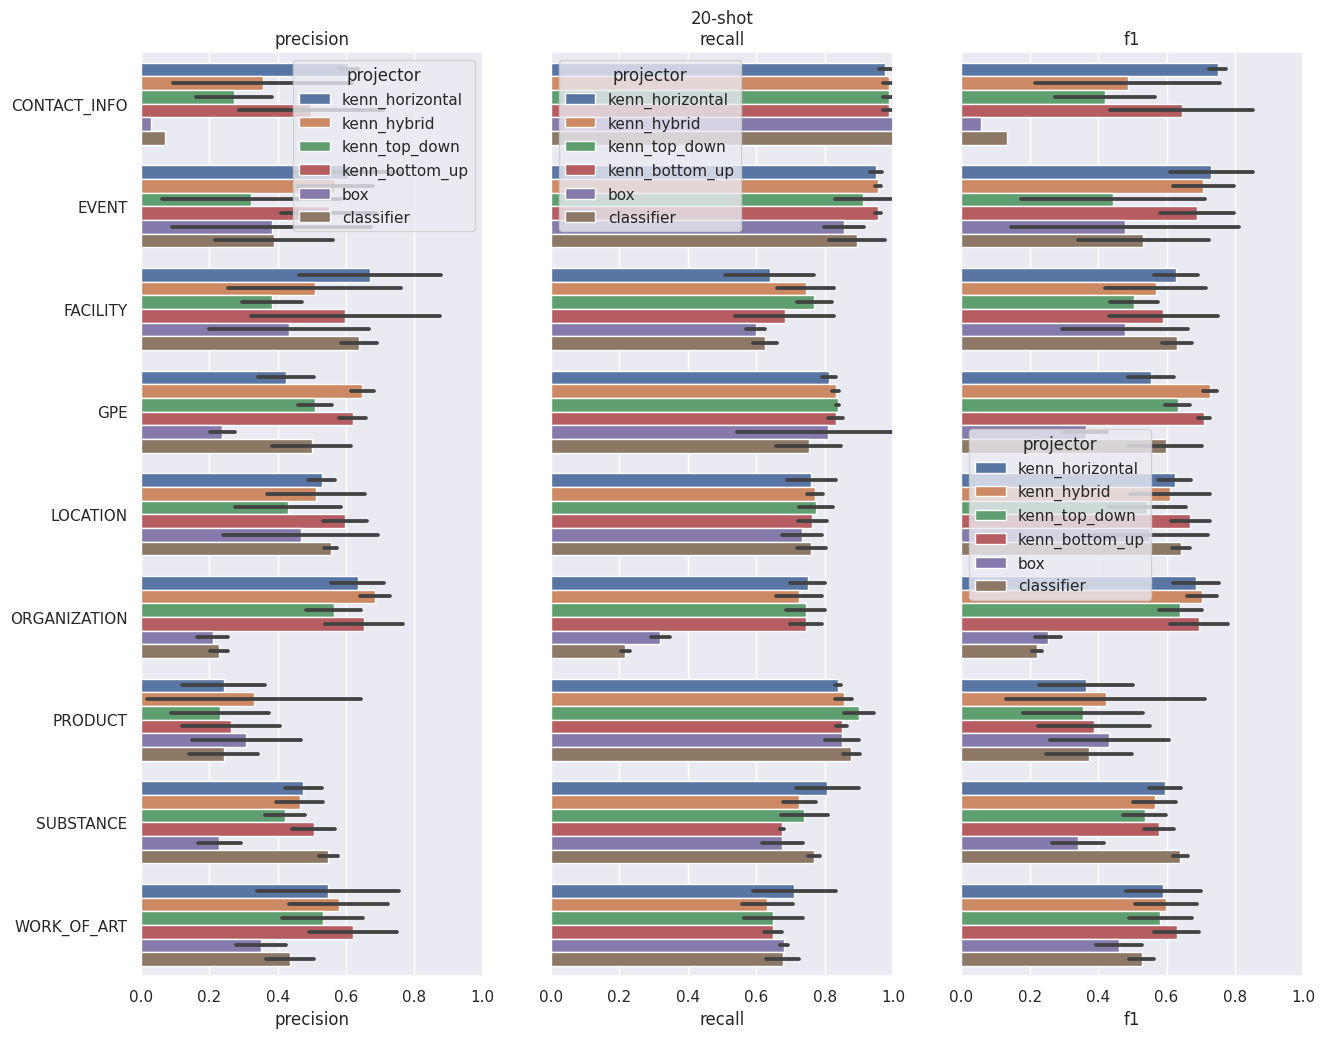

In [11]:
for subset in [10,20,40]:
  row_filter = {
  # 'family' : family,
  'subset' : subset,
  'metric' : 'test_incremental_only/macro_types'
  }
  df_filtered = filter_df(df_metrics, row_filter)
  title = f'{int(subset / 2)}-shot'
  plot_summary(df_filtered, title)



# Compute stats

### Utils

In [12]:
def compute_comparison(df):
  df_copy = df.copy()
  for metric in METRIC:
    delta_key = f'delta_{metric}'
    kenn_key = f'kenn_{metric}'
    other_key = f'other_{metric}'
    df_copy[delta_key] = df_copy[kenn_key] - df_copy[other_key]

    perc_key = f'perc_delta_{metric}'
    df_copy[perc_key] = round(df_copy[delta_key] / df_copy[other_key] * 100, 3)
  return df_copy

# def compare_stats(df, additional_columns={}):
#   columns = list(additional_columns.keys()) + ['metric', 'other_projector'] + KB_MODE + ['total']
#   df_stats = pd.DataFrame(columns=columns)
#   for other_projector in ['box', 'classifier']:
#     print('#'*5, f'kenn vs {other_projector}', '#'*5)

#     for metric in METRIC:
#       print('#'*3, metric.upper(), '#'*3)
      
#       key = f'delta_{metric}'
#       df_filtered = df[df['other_projector'] == other_projector]
      
#       # compute global kenn
#       n_kenn_better = len(df_filtered[df_filtered[key] > 0])
#       n_total = len(df_filtered)
#       perc = round(n_kenn_better / n_total * 100, 2)
#       print(f'- all: {n_kenn_better}/{n_total} = {perc}%')

#       # prepare row
#       row = {'other_projector': other_projector, 'metric': metric}

#       # compute single kenn
#       for kb_mode in KB_MODE:
#         kenn_projector = f'kenn_{kb_mode}'
#         df_filtered_kenn = df_filtered[df_filtered['kenn_projector'] == kenn_projector]
#         n_kenn_better = len(df_filtered_kenn[df_filtered_kenn[key] > 0])
#         n_total = len(df_filtered_kenn)
#         perc = round(n_kenn_better / n_total * 100, 2)
#         # update row
#         row[kb_mode] = n_kenn_better
#         row['total'] = n_total
#         print(f'- {kb_mode}: {n_kenn_better}/{n_total} = {perc}%')
#       df_stats = df_stats.append(row, ignore_index=True)
#     print()
#   for k, v in additional_columns.items():
#     df_stats[k] = v
#   return df_stats

def compare_stats(df, additional_columns={}):
  columns = list(additional_columns.keys()) + ['metric', 'kenn_projector', 'other_projector', 'n_kenn_better', 'total']
  df_stats = pd.DataFrame(columns=columns)
  for other_projector in ['box', 'classifier']:
    print('#'*5, f'kenn vs {other_projector}', '#'*5)

    for metric in METRIC:
      print('#'*3, metric.upper(), '#'*3)
      
      key = f'delta_{metric}'
      df_filtered = df[df['other_projector'] == other_projector]
      
      # compute global kenn
      n_kenn_better = len(df_filtered[df_filtered[key] > 0])
      n_total = len(df_filtered)
      perc = round(n_kenn_better / n_total * 100, 2)
      print(f'- all: {n_kenn_better}/{n_total} = {perc}%')

      # prepare row
      row = {'other_projector': other_projector, 'metric': metric}

      # compute single kenn
      for kb_mode in KB_MODE:
        kenn_projector = f'kenn_{kb_mode}'
        df_filtered_kenn = df_filtered[df_filtered['kenn_projector'] == kenn_projector]
        n_kenn_better = len(df_filtered_kenn[df_filtered_kenn[key] > 0])
        n_total = len(df_filtered_kenn)
        perc = round(n_kenn_better / n_total * 100, 2)
        # update row
        row['kenn_projector'] = kb_mode
        row['n_kenn_better'] = int(n_kenn_better)
        row['total'] = n_total
        print(f'- {kb_mode}: {n_kenn_better}/{n_total} = {perc}%')
        df_stats = df_stats.append(row, ignore_index=True)
    print()
  for k, v in additional_columns.items():
    df_stats[k] = v
  return df_stats
    

### KENN vs others

We are comparing results aggregated by different criteria.

#### Global level

In [13]:
# create df comparison
df_comparison = pd.DataFrame(columns=['family', 'subset', 'kenn_projector', 'other_projector',
                                      'kenn_precision', 'kenn_recall', 'kenn_f1',
                                      'other_precision', 'other_recall', 'other_f1'])
for subset in SUBSET:
  for family in FAMILY[DATA]:
    row_filter = {
    'family' : family,
    'subset' : subset,
    'metric' : 'test_incremental_only/macro_types'
    }
    df_filtered = filter_df(df_metrics, row_filter).drop(['instance', 'subset'], axis=1)
    df_aggregated = df_filtered.groupby(by='projector').mean()
    kenn_projectors = [idx for idx in df_aggregated.index if 'kenn' in idx]
    other_projectors = [idx for idx in df_aggregated.index if 'kenn' not in idx]
    # iterate over combinations
    for kenn_projector in kenn_projectors:
      for other_projector in other_projectors:
        row_comparison = {
          'family' : family,
          'subset' : subset,
          'kenn_projector' : kenn_projector,
          'other_projector' : other_projector,
          'kenn_precision' : df_aggregated.loc[kenn_projector, 'precision'],
          'kenn_recall' : df_aggregated.loc[kenn_projector, 'recall'],
          'kenn_f1' : df_aggregated.loc[kenn_projector, 'f1'],
          'other_precision' : df_aggregated.loc[other_projector, 'precision'],
          'other_recall' : df_aggregated.loc[other_projector, 'recall'],
          'other_f1' :df_aggregated.loc[other_projector, 'f1'] 
        }
        df_comparison = df_comparison.append(row_comparison, ignore_index=True)

# compute comparison
df_comparison = compute_comparison(df_comparison)
# extract stats
df_stats = compare_stats(df_comparison)
df_stats

##### kenn vs box #####
### PRECISION ###
- all: 91/108 = 84.26%
- bottom_up: 24/27 = 88.89%
- top_down: 17/27 = 62.96%
- hybrid: 25/27 = 92.59%
- horizontal: 25/27 = 92.59%
### RECALL ###
- all: 74/108 = 68.52%
- bottom_up: 18/27 = 66.67%
- top_down: 19/27 = 70.37%
- hybrid: 19/27 = 70.37%
- horizontal: 18/27 = 66.67%
### F1 ###
- all: 91/108 = 84.26%
- bottom_up: 24/27 = 88.89%
- top_down: 18/27 = 66.67%
- hybrid: 24/27 = 88.89%
- horizontal: 25/27 = 92.59%

##### kenn vs classifier #####
### PRECISION ###
- all: 87/108 = 80.56%
- bottom_up: 24/27 = 88.89%
- top_down: 18/27 = 66.67%
- hybrid: 23/27 = 85.19%
- horizontal: 22/27 = 81.48%
### RECALL ###
- all: 79/108 = 73.15%
- bottom_up: 20/27 = 74.07%
- top_down: 19/27 = 70.37%
- hybrid: 19/27 = 70.37%
- horizontal: 21/27 = 77.78%
### F1 ###
- all: 84/108 = 77.78%
- bottom_up: 24/27 = 88.89%
- top_down: 17/27 = 62.96%
- hybrid: 23/27 = 85.19%
- horizontal: 20/27 = 74.07%



metric kenn_projector other_projector n_kenn_better total
0   precision      bottom_up             box            24    27
1   precision       top_down             box            17    27
2   precision         hybrid             box            25    27
3   precision     horizontal             box            25    27
4      recall      bottom_up             box            18    27
5      recall       top_down             box            19    27
6      recall         hybrid             box            19    27
7      recall     horizontal             box            18    27
8          f1      bottom_up             box            24    27
9          f1       top_down             box            18    27
10         f1         hybrid             box            24    27
11         f1     horizontal             box            25    27
12  precision      bottom_up      classifier            24    27
13  precision       top_down      classifier            18    27
14  precision         hybrid      classifier            23    27
15  precision     horizontal      classifier            22    27
16     recall      bottom_up      classifier            20    27
17     recall       top_down      classifier            19    27
18     recall         hybrid      classifier            19    27
19     recall     horizontal      classifier            21    27
20         f1      bottom_up      classifier            24    27
21         f1       top_down      classifier            17    27
22         f1         hybrid      classifier            23    27
23         f1     horizontal      classifier            20    27

Compute per subsets

In [14]:
stats = {}
for subset in SUBSET:
  print('#'*7, f'{int(subset/2)}-shot', '#'*7)
  row_filter = {'subset': subset}
  df_comparison_filtered = filter_df(df_comparison, row_filter)
  stats[subset] = compare_stats(df_comparison_filtered, additional_columns=row_filter)
df_stats = pd.concat(stats.values())
df_stats

####### 5-shot #######
##### kenn vs box #####
### PRECISION ###
- all: 29/36 = 80.56%
- bottom_up: 8/9 = 88.89%
- top_down: 5/9 = 55.56%
- hybrid: 8/9 = 88.89%
- horizontal: 8/9 = 88.89%
### RECALL ###
- all: 23/36 = 63.89%
- bottom_up: 6/9 = 66.67%
- top_down: 6/9 = 66.67%
- hybrid: 6/9 = 66.67%
- horizontal: 5/9 = 55.56%
### F1 ###
- all: 29/36 = 80.56%
- bottom_up: 8/9 = 88.89%
- top_down: 5/9 = 55.56%
- hybrid: 8/9 = 88.89%
- horizontal: 8/9 = 88.89%

##### kenn vs classifier #####
### PRECISION ###
- all: 33/36 = 91.67%
- bottom_up: 9/9 = 100.0%
- top_down: 7/9 = 77.78%
- hybrid: 9/9 = 100.0%
- horizontal: 8/9 = 88.89%
### RECALL ###
- all: 25/36 = 69.44%
- bottom_up: 7/9 = 77.78%
- top_down: 6/9 = 66.67%
- hybrid: 6/9 = 66.67%
- horizontal: 6/9 = 66.67%
### F1 ###
- all: 32/36 = 88.89%
- bottom_up: 9/9 = 100.0%
- top_down: 6/9 = 66.67%
- hybrid: 9/9 = 100.0%
- horizontal: 8/9 = 88.89%

####### 10-shot #######
##### kenn vs box #####
### PRECISION ###
- all: 32/36 = 88.89%
- bott

subset     metric kenn_projector other_projector n_kenn_better total
0       10  precision      bottom_up             box             8     9
1       10  precision       top_down             box             5     9
2       10  precision         hybrid             box             8     9
3       10  precision     horizontal             box             8     9
4       10     recall      bottom_up             box             6     9
..     ...        ...            ...             ...           ...   ...
19      40     recall     horizontal      classifier             7     9
20      40         f1      bottom_up      classifier             7     9
21      40         f1       top_down      classifier             4     9
22      40         f1         hybrid      classifier             6     9
23      40         f1     horizontal      classifier             4     9

[72 rows x 6 columns]

#### Family level

**NOTE:** *Global level* must be executed before the cell below

In [15]:
stats = defaultdict(defaultdict)
for subset in SUBSET:
  print('#'*9, f'{int(subset/2)}-shot', '#'*9)
  for family in FAMILY[DATA]:
    print('#'*7, family, '#'*7)
    row_filter = {'subset': subset, 'family': family}
    df_comparison_filtered = filter_df(df_comparison, row_filter)
    stats[subset][family] = compare_stats(df_comparison_filtered, additional_columns=row_filter)

df_stats = pd.concat([pd.concat(v.values()) for v in stats.values()])
df_stats

######### 5-shot #########
####### CONTACT_INFO #######
##### kenn vs box #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%
### RECALL ###
- all: 0/4 = 0.0%
- bottom_up: 0/1 = 0.0%
- top_down: 0/1 = 0.0%
- hybrid: 0/1 = 0.0%
- horizontal: 0/1 = 0.0%
### F1 ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%

##### kenn vs classifier #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%
### RECALL ###
- all: 0/4 = 0.0%
- bottom_up: 0/1 = 0.0%
- top_down: 0/1 = 0.0%
- hybrid: 0/1 = 0.0%
- horizontal: 0/1 = 0.0%
### F1 ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%

####### EVENT #######
##### kenn vs box #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_

subset        family     metric kenn_projector other_projector  \
0       10  CONTACT_INFO  precision      bottom_up             box   
1       10  CONTACT_INFO  precision       top_down             box   
2       10  CONTACT_INFO  precision         hybrid             box   
3       10  CONTACT_INFO  precision     horizontal             box   
4       10  CONTACT_INFO     recall      bottom_up             box   
..     ...           ...        ...            ...             ...   
19      40   WORK_OF_ART     recall     horizontal      classifier   
20      40   WORK_OF_ART         f1      bottom_up      classifier   
21      40   WORK_OF_ART         f1       top_down      classifier   
22      40   WORK_OF_ART         f1         hybrid      classifier   
23      40   WORK_OF_ART         f1     horizontal      classifier   

   n_kenn_better total  
0              1     1  
1              1     1  
2              1     1  
3              1     1  
4              0     1  
..           ...   ...  
19             1     1  
20             1     1  
21             1     1  
22             1     1  
23             1     1  

[648 rows x 7 columns]

Table

In [16]:
# kenn vs other - k-shot
other_projector = 'box'
subset = 10
print(f'kenn vs {other_projector} - {subset}-shot')
row_filter = {'other_projector': other_projector, 'subset': subset}
df_comparison_filtered = filter_df(df_comparison, row_filter)
cols_delta = [c for c in df_comparison_filtered.columns if 'delta_' in c]
df_comparison_filtered[['family', 'kenn_projector'] + cols_delta]

kenn vs box - 10-shot


family   kenn_projector  delta_precision  perc_delta_precision  \
0   CONTACT_INFO   kenn_bottom_up         0.361756              1239.619   
2   CONTACT_INFO  kenn_horizontal         0.326247              1117.940   
4   CONTACT_INFO      kenn_hybrid         0.200287               686.316   
6   CONTACT_INFO    kenn_top_down         0.236597               810.738   
8          EVENT   kenn_bottom_up         0.388626               239.405   
10         EVENT  kenn_horizontal         0.479605               295.451   
12         EVENT      kenn_hybrid         0.479529               295.405   
14         EVENT    kenn_top_down         0.350035               215.632   
16      FACILITY   kenn_bottom_up         0.417885               145.949   
18      FACILITY  kenn_horizontal         0.335941               117.329   
20      FACILITY      kenn_hybrid         0.350265               122.332   
22      FACILITY    kenn_top_down         0.244004                85.220   
24           GPE   kenn_bottom_up         0.035846                11.852   
26           GPE  kenn_horizontal        -0.007584                -2.508   
28           GPE      kenn_hybrid         0.156608                51.780   
30           GPE    kenn_top_down        -0.010428                -3.448   
32      LOCATION   kenn_bottom_up        -0.040518               -13.019   
34      LOCATION  kenn_horizontal         0.046464                14.929   
36      LOCATION      kenn_hybrid        -0.023628                -7.592   
38      LOCATION    kenn_top_down        -0.026058                -8.373   
40  ORGANIZATION   kenn_bottom_up         0.428970               309.098   
42  ORGANIZATION  kenn_horizontal         0.364941               262.961   
44  ORGANIZATION      kenn_hybrid         0.497018               358.131   
46  ORGANIZATION    kenn_top_down         0.357662               257.717   
48       PRODUCT   kenn_bottom_up         0.152184                55.869   
50       PRODUCT  kenn_horizontal         0.256617                94.208   
52       PRODUCT      kenn_hybrid         0.074994                27.531   
54       PRODUCT    kenn_top_down        -0.015748                -5.781   
56     SUBSTANCE   kenn_bottom_up         0.247098               119.591   
58     SUBSTANCE  kenn_horizontal         0.246893               119.492   
60     SUBSTANCE      kenn_hybrid         0.305269               147.745   
62     SUBSTANCE    kenn_top_down        -0.063129               -30.554   
64   WORK_OF_ART   kenn_bottom_up         0.413603               138.037   
66   WORK_OF_ART  kenn_horizontal         0.441345               147.295   
68   WORK_OF_ART      kenn_hybrid         0.259681                86.666   
70   WORK_OF_ART    kenn_top_down         0.162491                54.230   

    delta_recall  perc_delta_recall  delta_f1  perc_delta_f1  
0      -0.022222             -2.222  0.456645        805.218  
2      -0.022222             -2.222  0.423286        746.394  
4      -0.022222             -2.222  0.292479        515.738  
6      -0.011111             -1.111  0.335534        591.659  
8       0.255556             38.017  0.427721        173.331  
10      0.205556             30.579  0.494123        200.240  
12      0.216667             32.231  0.498589        202.050  
14      0.238889             35.537  0.398336        161.423  
16      0.057576             11.810  0.264389         75.800  
18      0.103409             21.212  0.251094         71.989  
20      0.105303             21.601  0.260262         74.617  
22      0.110101             22.585  0.208005         59.635  
24      0.033017              4.248  0.049605         11.877  
26     -0.076041             -9.783 -0.003511         -0.841  
28     -0.033520             -4.312  0.142947         34.225  
30     -0.052885             -6.804 -0.003699         -0.886  
32      0.020370              2.906 -0.056699        -13.168  
34      0.066204              9.445  0.044191         10.263  


Table improvements over subsets

TODO: transform table in order to have row=family, col=projector, val=f1(40)-f1(10) ?

In [17]:
metric = 'test_incremental_only/macro_types'
cols = ['family', 'projector',
        'delta_precision_10_20', 'delta_precision_10_40', 'delta_precision_20_40',
        'delta_recall_10_20', 'delta_recall_10_40', 'delta_recall_20_40',
        'delta_f1_10_20', 'delta_f1_10_40', 'delta_f1_20_40']
df_comparison_subsets = pd.DataFrame(columns=cols)

for family in FAMILY[DATA]:
  for projector in PROJECTOR:
    row_filter = {'metric': metric, 'projector': projector, 'family': family}
    df_filtered = filter_df(df_metrics, row_filter)
    df_filtered_aggregated = df_filtered.groupby('subset').mean().drop('instance', axis=1)
    row = {'family': family,
          'projector': projector,
          'delta_precision_10_20': df_filtered_aggregated.loc[20, 'precision'] - df_filtered_aggregated.loc[10, 'precision'],
          'delta_precision_10_40': df_filtered_aggregated.loc[40, 'precision'] - df_filtered_aggregated.loc[10, 'precision'], 
          'delta_precision_20_40': df_filtered_aggregated.loc[40, 'precision'] - df_filtered_aggregated.loc[20, 'precision'],
          'delta_recall_10_20': df_filtered_aggregated.loc[20, 'recall'] - df_filtered_aggregated.loc[10, 'recall'],
          'delta_recall_10_40': df_filtered_aggregated.loc[40, 'recall'] - df_filtered_aggregated.loc[10, 'recall'],
          'delta_recall_20_40': df_filtered_aggregated.loc[40, 'recall'] - df_filtered_aggregated.loc[20, 'recall'],
          'delta_f1_10_20': df_filtered_aggregated.loc[20, 'f1'] - df_filtered_aggregated.loc[10, 'f1'],
          'delta_f1_10_40': df_filtered_aggregated.loc[40, 'f1'] - df_filtered_aggregated.loc[10, 'f1'],
          'delta_f1_20_40': df_filtered_aggregated.loc[40, 'f1'] - df_filtered_aggregated.loc[20, 'f1']}
    df_comparison_subsets = df_comparison_subsets.append(row, ignore_index=True)

df_comparison_subsets

family        projector  delta_precision_10_20  \
0   CONTACT_INFO       classifier               0.000000   
1   CONTACT_INFO              box               0.000000   
2   CONTACT_INFO   kenn_bottom_up              -0.140826   
3   CONTACT_INFO    kenn_top_down              -0.058458   
4   CONTACT_INFO      kenn_hybrid              -0.040581   
5   CONTACT_INFO  kenn_horizontal              -0.286382   
6          EVENT       classifier               0.016035   
7          EVENT              box              -0.021411   
8          EVENT   kenn_bottom_up              -0.001389   
9          EVENT    kenn_top_down               0.030143   
10         EVENT      kenn_hybrid              -0.124787   
11         EVENT  kenn_horizontal              -0.012876   
12      FACILITY       classifier               0.230676   
13      FACILITY              box               0.108697   
14      FACILITY   kenn_bottom_up              -0.089556   
15      FACILITY    kenn_top_down               0.037684   
16      FACILITY      kenn_hybrid              -0.077960   
17      FACILITY  kenn_horizontal              -0.034126   
18           GPE       classifier               0.014204   
19           GPE              box               0.049654   
20           GPE   kenn_bottom_up               0.239447   
21           GPE    kenn_top_down               0.097534   
22           GPE      kenn_hybrid               0.034084   
23           GPE  kenn_horizontal               0.224121   
24      LOCATION       classifier               0.087935   
25      LOCATION              box               0.048456   
26      LOCATION   kenn_bottom_up               0.101374   
27      LOCATION    kenn_top_down               0.033673   
28      LOCATION      kenn_hybrid               0.159968   
29      LOCATION  kenn_horizontal               0.225926   
30  ORGANIZATION       classifier              -0.004399   
31  ORGANIZATION              box               0.014266   
32  ORGANIZATION   kenn_bottom_up               0.064068   
33  ORGANIZATION    kenn_top_down              -0.056766   
34  ORGANIZATION      kenn_hybrid              -0.112380   
35  ORGANIZATION  kenn_horizontal               0.159419   
36       PRODUCT       classifier               0.180337   
37       PRODUCT              box               0.135178   
38       PRODUCT   kenn_bottom_up              -0.111747   
39       PRODUCT    kenn_top_down              -0.014410   
40       PRODUCT      kenn_hybrid              -0.117356   
41       PRODUCT  kenn_horizontal              -0.005334   
42     SUBSTANCE       classifier               0.030286   
43     SUBSTANCE              box               0.023549   
44     SUBSTANCE   kenn_bottom_up               0.096662   
45     SUBSTANCE    kenn_top_down               0.158385   
46     SUBSTANCE      kenn_hybrid               0.015015   
47     SUBSTANCE  kenn_horizontal              -0.016233   
48   WORK_OF_ART       classifier               0.182824   
49   WORK_OF_ART              box               0.078672   
50   WORK_OF_ART   kenn_bottom_up              -0.074445   
51   WORK_OF_ART    kenn_top_down               0.089360   
52   WORK_OF_ART      kenn_hybrid               0.074354   
53   WORK_OF_ART  kenn_horizontal              -0.067032   

    delta_precision_10_40  delta_precision_20_40  delta_recall_10_20  \
0                0.000000               0.000000            0.000000   
1                0.000000               0.000000            0.000000   
2                0.106271               0.247097            0.000000   
3                0.006794               0.065252           -0.011111   
4                0.126680               0.167261            0.000000   
5                0.251894               0.538276           -0.011111   
6                0.134401               0.118366           -0.038889   
7                0.220578               0.241989            0.016667   
8               -0.001613              -0.000225            0

Table improvements over cross-subsets (kenn-X-shot vs other-Y-shot)

In [18]:
metric = 'test_incremental_only/macro_types'
cols = ['family', 'kenn_projector', 'other_projector',
        'delta_precision', 'delta_recall', 'delta_f1']
df_comparison_subsets = pd.DataFrame(columns=cols)
other_projector = 'classifier'
subset_kenn = 10
subset_other = 40
for family in FAMILY[DATA]:
  # for other_projector in ['classifier', 'box']:
    row_filter = {'metric': metric, 'projector': other_projector, 'family': family, 'subset': subset_other}
    df_filtered_other = filter_df(df_metrics, row_filter)
    df_filtered_other_aggregated = df_filtered_other.groupby('subset').mean().drop('instance', axis=1)
    for kb_mode in KB_MODE:
      kenn_projector = f'kenn_{kb_mode}'
      row_filter = {'metric': metric, 'projector': kenn_projector, 'family': family, 'subset': subset_kenn}
      df_filtered_kenn = filter_df(df_metrics, row_filter)
      df_filtered_kenn_aggregated = df_filtered_kenn.groupby('subset').mean().drop('instance', axis=1)
      
      row = {'family': family,
            'kenn_projector': kenn_projector,
            'other_projector': other_projector,
            'delta_precision': df_filtered_kenn_aggregated.loc[subset_kenn, 'precision'] - df_filtered_other_aggregated.loc[subset_other, 'precision'],
            'delta_recall': df_filtered_kenn_aggregated.loc[subset_kenn, 'recall'] - df_filtered_other_aggregated.loc[subset_other, 'recall'],
            'delta_f1': df_filtered_kenn_aggregated.loc[subset_kenn, 'f1'] - df_filtered_other_aggregated.loc[subset_other, 'f1']}
      df_comparison_subsets = df_comparison_subsets.append(row, ignore_index=True)


print(f'kenn {int(subset_kenn/2)}-shot > {other_projector} {int(subset_other/2)}-shot:')
print(f"PRECISION: {len(df_comparison_subsets[df_comparison_subsets['delta_precision'] > 0])}/{len(df_comparison_subsets)}")
print(f"RECALL: {len(df_comparison_subsets[df_comparison_subsets['delta_recall'] > 0])}/{len(df_comparison_subsets)}")
print(f"F1: {len(df_comparison_subsets[df_comparison_subsets['delta_f1'] > 0])}/{len(df_comparison_subsets)}")


kenn 5-shot > classifier 20-shot:
PRECISION: 21/36
RECALL: 11/36
F1: 18/36


#### Type level

##### Single

Compute comparison

In [19]:
# create df comparison
df_comparison = pd.DataFrame(columns=['family', 'subtype', 'subset', 'kenn_projector', 'other_projector',
                                      'kenn_precision', 'kenn_recall', 'kenn_f1',
                                      'other_precision', 'other_recall', 'other_f1'])
for subset in SUBSET:
  print('#'*11, f'{int(subset/2)}-shot', '#'*11)
  for family in FAMILY[DATA]:
    print('#'*9, family, '#'*9)
    metrics = set(df_metrics[df_metrics['metric'].apply(lambda x: x.startswith(f'test_incremental_{family}-'))]['metric'])
    for metric in metrics:
      subtype = metric.split('-')[-1].split('/')[0]
      print('#'*7, subtype, '#'*7)
      row_filter = {
      'family' : family,
      'metric' : metric
      }
      df_filtered = filter_df(df_metrics, row_filter)
      df_aggregated = df_filtered.groupby(by='projector').mean()
      kenn_projectors = [idx for idx in df_aggregated.index if 'kenn' in idx]
      other_projectors = [idx for idx in df_aggregated.index if 'kenn' not in idx]

      df_comparison_type = pd.DataFrame(columns=df_comparison.columns)
      # iterate over combinations
      for kenn_projector in kenn_projectors:
        for other_projector in other_projectors:
          row_comparison = {
            'family' : family,
            'subtype' : subtype,
            'subset' : subset,
            'kenn_projector' : kenn_projector,
            'other_projector' : other_projector,
            'kenn_precision' : df_aggregated.loc[kenn_projector, 'precision'],
            'kenn_recall' : df_aggregated.loc[kenn_projector, 'recall'],
            'kenn_f1' : df_aggregated.loc[kenn_projector, 'f1'],
            'other_precision' : df_aggregated.loc[other_projector, 'precision'],
            'other_recall' : df_aggregated.loc[other_projector, 'recall'],
            'other_f1' :df_aggregated.loc[other_projector, 'f1'] 
          }
          df_comparison = df_comparison.append(row_comparison, ignore_index=True)
          df_comparison_type = df_comparison_type.append(row_comparison, ignore_index=True)

      # compute comparison
      df_comparison_type = compute_comparison(df_comparison_type)
      # print stats
      compare_stats(df_comparison_type)
      print('-'*50)



########### 5-shot ###########
######### CONTACT_INFO #########
####### url #######
##### kenn vs box #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%
### RECALL ###
- all: 0/4 = 0.0%
- bottom_up: 0/1 = 0.0%
- top_down: 0/1 = 0.0%
- hybrid: 0/1 = 0.0%
- horizontal: 0/1 = 0.0%
### F1 ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%

##### kenn vs classifier #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%
### RECALL ###
- all: 0/4 = 0.0%
- bottom_up: 0/1 = 0.0%
- top_down: 0/1 = 0.0%
- hybrid: 0/1 = 0.0%
- horizontal: 0/1 = 0.0%
### F1 ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%

--------------------------------------------------
######### EVEN

##### Aggregated (all)

Compute comparison

In [20]:
stats = {}
# compute comparison
df_comparison = compute_comparison(df_comparison)
for subset in SUBSET:
  row_filter = {'subset': subset}
  df_comparison_filtered = filter_df(df_comparison, row_filter)
  stats[subset] = compare_stats(df_comparison_filtered, row_filter)
  print('-'*50)
df_stats = pd.concat(stats.values())

##### kenn vs box #####
### PRECISION ###
- all: 94/104 = 90.38%
- bottom_up: 24/26 = 92.31%
- top_down: 22/26 = 84.62%
- hybrid: 24/26 = 92.31%
- horizontal: 24/26 = 92.31%
### RECALL ###
- all: 71/104 = 68.27%
- bottom_up: 17/26 = 65.38%
- top_down: 20/26 = 76.92%
- hybrid: 18/26 = 69.23%
- horizontal: 16/26 = 61.54%
### F1 ###
- all: 95/104 = 91.35%
- bottom_up: 24/26 = 92.31%
- top_down: 23/26 = 88.46%
- hybrid: 24/26 = 92.31%
- horizontal: 24/26 = 92.31%

##### kenn vs classifier #####
### PRECISION ###
- all: 88/104 = 84.62%
- bottom_up: 24/26 = 92.31%
- top_down: 15/26 = 57.69%
- hybrid: 25/26 = 96.15%
- horizontal: 24/26 = 92.31%
### RECALL ###
- all: 71/104 = 68.27%
- bottom_up: 16/26 = 61.54%
- top_down: 20/26 = 76.92%
- hybrid: 20/26 = 76.92%
- horizontal: 15/26 = 57.69%
### F1 ###
- all: 89/104 = 85.58%
- bottom_up: 25/26 = 96.15%
- top_down: 15/26 = 57.69%
- hybrid: 25/26 = 96.15%
- horizontal: 24/26 = 92.31%

--------------------------------------------------
##### kenn v

Barplots

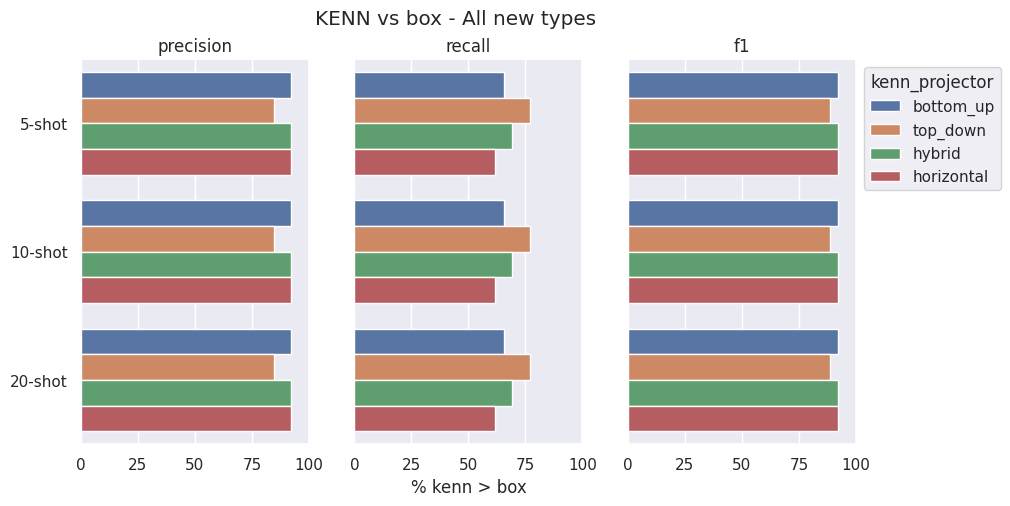

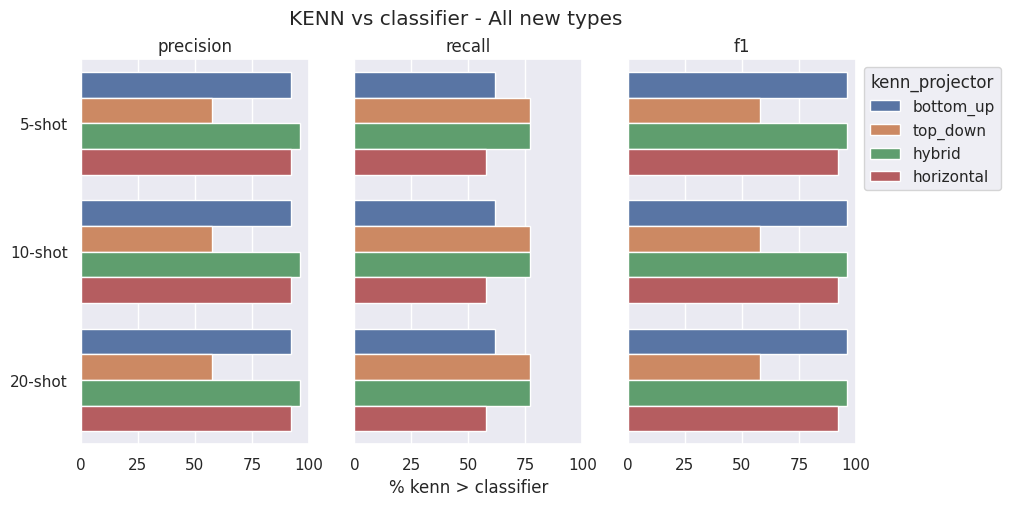

In [21]:
df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
df_stats['perc_total'] = 100
for other_projector in ['box', 'classifier']:
  fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,5))
  plt.xlim((0,100))
  fig.suptitle(f'KENN vs {other_projector} - All new types')
  for i, metric in enumerate(METRIC):
    axes[i].set_title(metric)
    row_filter = {'other_projector': other_projector, 'metric': metric}
    df_stats_filtered = filter_df(df_stats, row_filter)
    # draw plots
    # bp_total = sns.barplot(data=df_stats_filtered, x='perc_total', y='subset', color='grey', alpha=.7, errorbar=None, ax=axes[i], orient='horizontal')
    bp_kenn_better = sns.barplot(data=df_stats_filtered, x='perc_kenn_better', y='subset', hue='kenn_projector', errorbar=None, ax=axes[i], orient='horizontal')
    # adjust plots
    # bp_total.set(ylabel=None, xlabel=None, yticklabels=['5-shot', '10-shot', '20-shot'])
    bp_kenn_better.set(ylabel=None, xlabel=None, yticklabels=['5-shot', '10-shot', '20-shot'])
    if i == 1:
      bp_kenn_better.set(xlabel=f'% kenn > {other_projector}')
    if i == 2:
      sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
    else:
      bp_kenn_better.legend_.remove()

  plt.show()

Table improvements

In [22]:
# kenn vs other - k-shot
other_projector = 'box'
subset = 10
print(f'kenn vs {other_projector} - {subset}-shot')
row_filter = {'other_projector': other_projector, 'subset': subset}
df_comparison_filtered = filter_df(df_comparison, row_filter)
df_comparison_filtered['type'] = '/' + df_comparison_filtered['family'] + '/' + df_comparison_filtered['subtype']
cols_delta = [c for c in df_comparison_filtered.columns if 'delta_' in c]
df_comparison_filtered[['type', 'kenn_projector'] + cols_delta]

kenn vs box - 10-shot


type   kenn_projector  delta_precision  \
0    /CONTACT_INFO/url   kenn_bottom_up         0.350238   
2    /CONTACT_INFO/url  kenn_horizontal         0.314751   
4    /CONTACT_INFO/url      kenn_hybrid         0.228987   
6    /CONTACT_INFO/url    kenn_top_down         0.219376   
8     /EVENT/HURRICANE   kenn_bottom_up         0.319094   
..                 ...              ...              ...   
198  /WORK_OF_ART/SONG    kenn_top_down        -0.024458   
200  /WORK_OF_ART/BOOK   kenn_bottom_up         0.540579   
202  /WORK_OF_ART/BOOK  kenn_horizontal         0.483745   
204  /WORK_OF_ART/BOOK      kenn_hybrid         0.433152   
206  /WORK_OF_ART/BOOK    kenn_top_down         0.368288   

     perc_delta_precision  delta_recall  perc_delta_recall  delta_f1  \
0                1200.149 -1.851853e-02             -1.852  0.442049   
2                1078.546 -2.592595e-02             -2.593  0.395982   
4                 784.661 -1.851853e-02             -1.852  0.317087   
6                 751.727 -1.481483e-02             -1.481  0.314966   
8                  92.396  2.148148e-01             29.897  0.351846   
..                    ...           ...                ...       ...   
198                -3.825  6.622738e-09              0.000 -0.008415   
200              1148.379 -1.136951e-01            -12.325  0.568154   
202              1027.643 -1.343669e-01            -14.566  0.517636   
204               920.166 -1.291990e-01            -14.006  0.489565   
206               782.372 -1.033592e-01            -11.204  0.442269   

     perc_delta_f1  
0          779.481  
2          698.248  
4          559.131  
6          555.390  
8           89.376  
..             ...  
198         -1.747  
200        637.269  
202        580.605  
204        549.119  
206        496.070  

[104 rows x 8 columns]

##### Aggregated by family

Compute comparison

In [23]:
stats = defaultdict(defaultdict)
# compute comparison
df_comparison = compute_comparison(df_comparison)
for subset in SUBSET:
  print('#'*9, f'{int(subset/2)}-shot', '#'*9)
  for family in FAMILY[DATA]:
    print('#'*7, family, '#'*7)
    row_filter = {'subset': subset, 'family': family}
    df_comparison_filtered = filter_df(df_comparison, row_filter)
    stats[subset][family] = compare_stats(df_comparison_filtered, additional_columns=row_filter)

df_stats = pd.concat([pd.concat(v.values()) for v in stats.values()])
df_stats

######### 5-shot #########
####### CONTACT_INFO #######
##### kenn vs box #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%
### RECALL ###
- all: 0/4 = 0.0%
- bottom_up: 0/1 = 0.0%
- top_down: 0/1 = 0.0%
- hybrid: 0/1 = 0.0%
- horizontal: 0/1 = 0.0%
### F1 ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%

##### kenn vs classifier #####
### PRECISION ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%
### RECALL ###
- all: 0/4 = 0.0%
- bottom_up: 0/1 = 0.0%
- top_down: 0/1 = 0.0%
- hybrid: 0/1 = 0.0%
- horizontal: 0/1 = 0.0%
### F1 ###
- all: 4/4 = 100.0%
- bottom_up: 1/1 = 100.0%
- top_down: 1/1 = 100.0%
- hybrid: 1/1 = 100.0%
- horizontal: 1/1 = 100.0%

####### EVENT #######
##### kenn vs box #####
### PRECISION ###
- all: 8/8 = 100.0%
- bottom_

subset        family     metric kenn_projector other_projector  \
0       10  CONTACT_INFO  precision      bottom_up             box   
1       10  CONTACT_INFO  precision       top_down             box   
2       10  CONTACT_INFO  precision         hybrid             box   
3       10  CONTACT_INFO  precision     horizontal             box   
4       10  CONTACT_INFO     recall      bottom_up             box   
..     ...           ...        ...            ...             ...   
19      40   WORK_OF_ART     recall     horizontal      classifier   
20      40   WORK_OF_ART         f1      bottom_up      classifier   
21      40   WORK_OF_ART         f1       top_down      classifier   
22      40   WORK_OF_ART         f1         hybrid      classifier   
23      40   WORK_OF_ART         f1     horizontal      classifier   

   n_kenn_better total  
0              1     1  
1              1     1  
2              1     1  
3              1     1  
4              0     1  
..           ...   ...  
19             1     2  
20             2     2  
21             2     2  
22             2     2  
23             2     2  

[648 rows x 7 columns]

Barplots

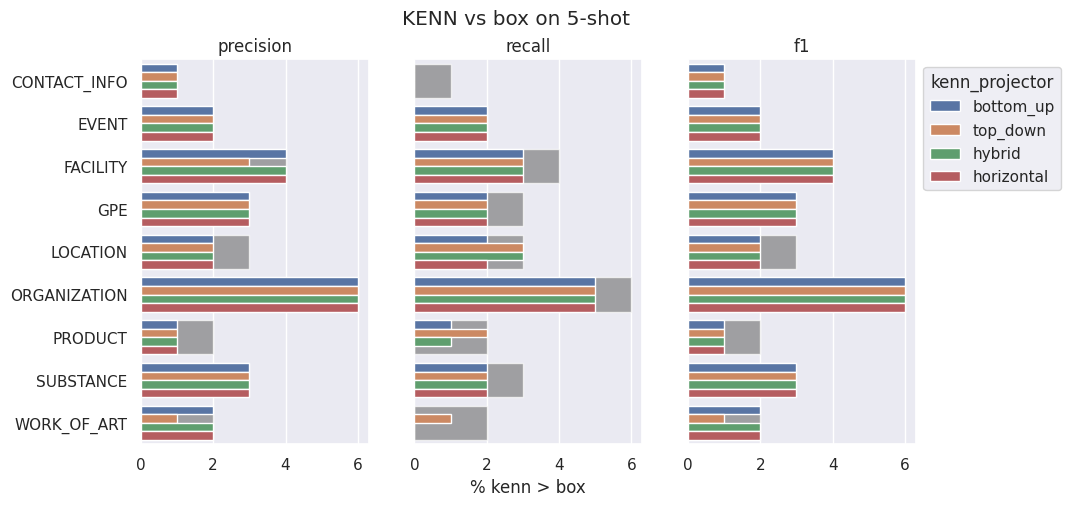

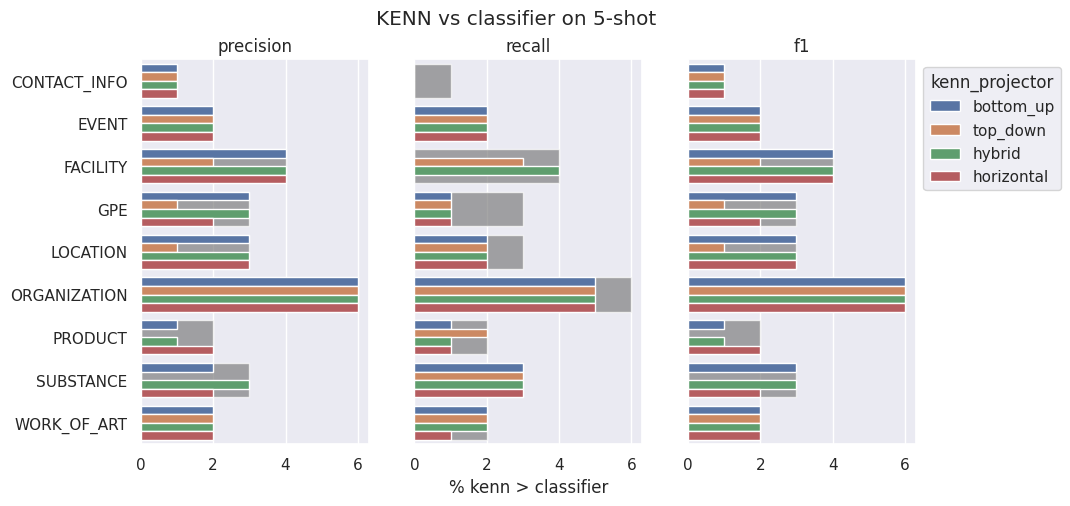

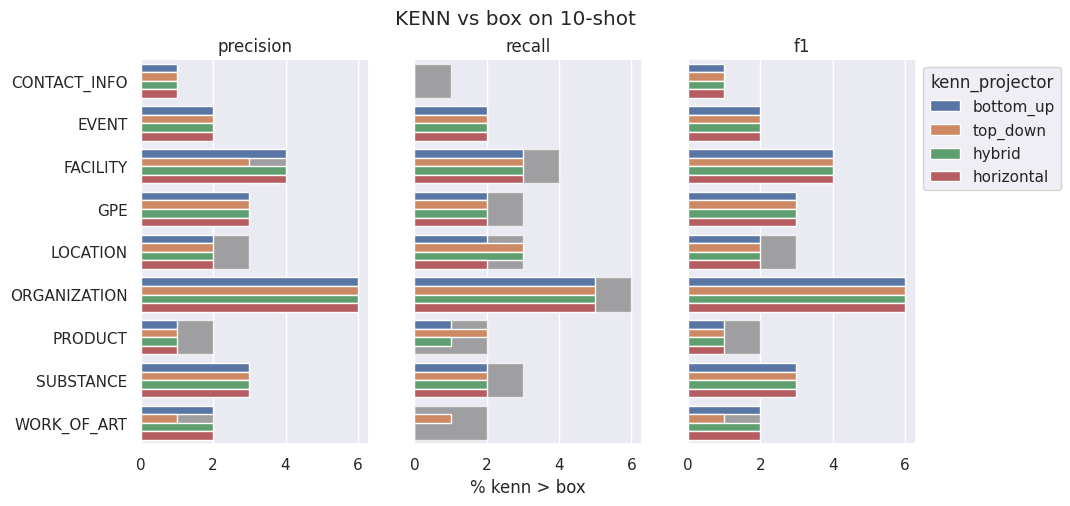

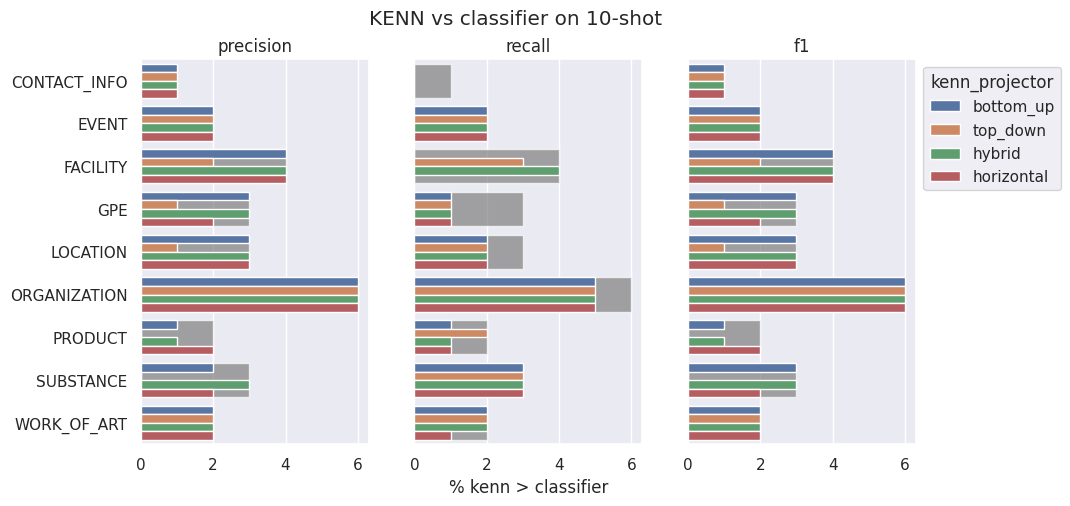

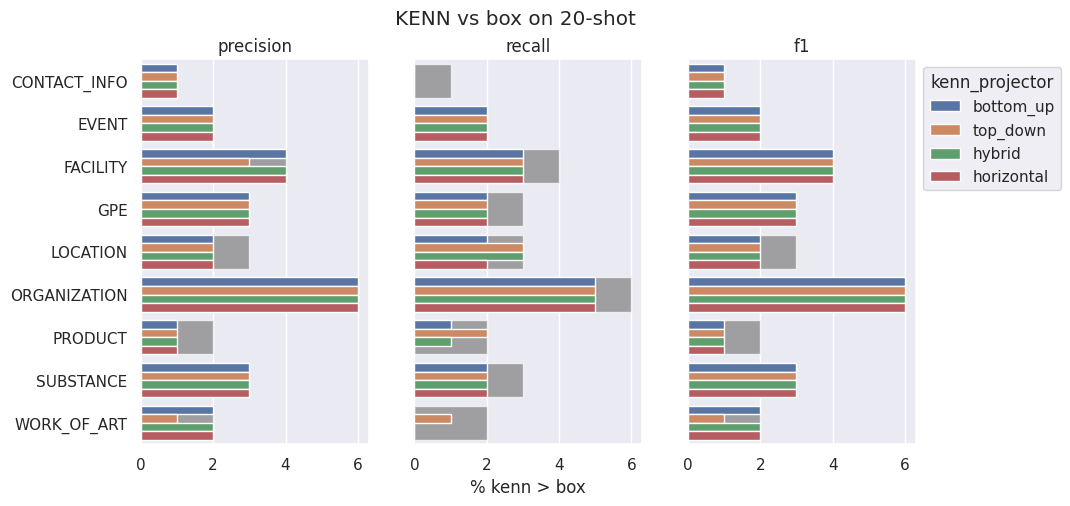

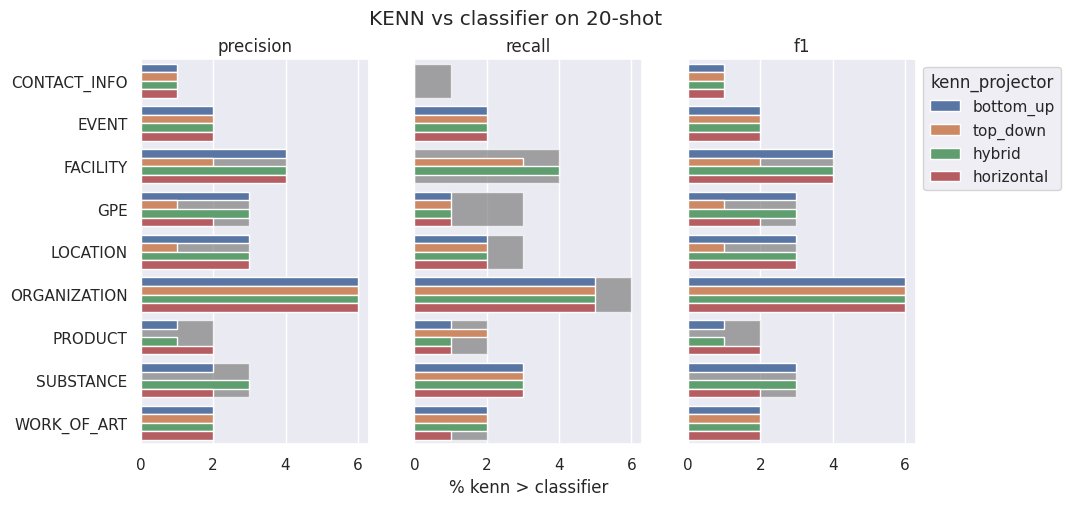

In [24]:
df_stats['perc_kenn_better'] = df_stats['n_kenn_better'] / df_stats['total'] * 100
df_stats['perc_total'] = 100
for subset in SUBSET:
  for other_projector in ['box', 'classifier']:
    fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,5))
    fig.suptitle(f'KENN vs {other_projector} on {int(subset/2)}-shot')
    for i, metric in enumerate(METRIC):
      axes[i].set_title(metric)
      row_filter = {'other_projector': other_projector, 'subset': subset, 'metric': metric}
      df_stats_filtered = filter_df(df_stats, row_filter)
      # sns.barplot(data=df_stats_filtered, x='total', y='family', hue='kenn_projector', alpha=.3, errorbar=None)
      bp_total = sns.barplot(data=df_stats_filtered, x='total', y='family', color='grey', alpha=.7, errorbar=None, ax=axes[i])
      bp_kenn_better = sns.barplot(data=df_stats_filtered, x='n_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=axes[i])
      # bp_total = sns.barplot(data=df_stats_filtered, x='perc_total', y='family', color='grey', alpha=.7, errorbar=None, ax=axes[i])
      # bp_kenn_better = sns.barplot(data=df_stats_filtered, x='perc_kenn_better', y='family', hue='kenn_projector', errorbar=None, ax=axes[i])
      bp_total.set(ylabel=None, xlabel=None)
      bp_kenn_better.set(ylabel=None, xlabel=None)
      if i == 1:
        bp_kenn_better.set(xlabel=f'% kenn > {other_projector}')
      if i == 2:
        sns.move_legend(bp_kenn_better, 'upper left', bbox_to_anchor=(1,1))
      else:
        bp_kenn_better.legend_.remove()
    
    plt.show()